# NETWORK ANALYSIS OF SHAKESPEARE'S JULIUS CAESAR

In [4]:
%matplotlib inline 
%load_ext autoreload
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Text Preparation

The text file of Shakespeare's Julius Caesar ('corpora/ShakespeareJuliusCaesarOrig_from_PG.txt') was downloaded from Project Gutenberg and it was modified in such a way that all the names of characters (as "actors" in the social networks sense) appear as such in a uniform way. This modified text ('corpora/ShakespeareJuliusCaesar_mod1.txt') is the one processed here.

In [5]:
fileName = 'corpora/ShakespeareJuliusCaesar_mod1.txt'
f=open(fileName,'r')

In [6]:
%autoreload 2
from testy1 import *
from syntheticThreeLayerGraph_time import synthetic_multi_level_dict,plot_graph_dict,plot_graph_k_n, plot_total_graph_with_weights

act_dict,u,pers_l,pers_dict,pact,lact=create_dict_of_acts(fileName)

print 'Characters (actors) appearing in Julius Caesar:'
print
for actor in pers_l:
    print actor
print
print 'The number of characters (actors) in Julius Caesar is', len(pers_l)


Characters (actors) appearing in Julius Caesar:

ANTONIUS
ARTEMIDORUS
BRUTUS
CAESAR
CALPURNIA
CASCA
CASSIUS
CATO
CICERO
CINNA
CINNA THE POET
CITIZENS
CLAUDIUS
CLITUS
DARDANIUS
DECIUS
FIRST CITIZEN
FIRST SERVANT
FIRST SOLDIER
FLAVIUS
FOURTH CITIZEN
GHOST
LEPIDUS
LIGARIUS
LUCILIUS
LUCIUS
MARULLUS
MESSALA
MESSENGER
METELLUS
OCTAVIUS
PINDARUS
POPILIUS
PORTIA
PUBLIUS
SECOND CITIZEN
SECOND SERVANT
SECOND SOLDIER
SOOTHSAYER
STRATO
THIRD CITIZEN
THIRD SERVANT
THIRD SOLDIER
TITINIUS
TREBONIUS
VARRO
VOLUMNIUS

The number of characters (actors) in Julius Caesar is 47


## Detection of characters (actors) and conversational relationships (ties) among them

The relationship (tie) among the above characters (actors) detected (automatically) here is the so-called "conversational relationship" which is defined whenever two characters are co-participating in a conversation. Actually, due to the structure of Shakespeare's printed text (in Project Gutenberg), the unit of conversation (or conversational chunk) used here is the body of the text which is delimited between two empty lines. In this way, the resulting network is represented by a weighted undirected graph, where tha weight of a edge joining two characters is the total number of conversational chaunks that these characters are involved in. Moreover, we are decomposing the network into slices (or layers) according to one of the five Acts during which the measured coversations take place.

In [7]:
graph_dic,ract_dic,pernode_dict,nodper_dic,cnum=create_graph_dict(act_dict,pers_l,pers_dict,u)
G, list_of_Graphs_final, Gagr, edgeList ,nmap ,mapping,k,n=synthetic_multi_level_dict(graph_dic,pernode_dict,nodper_dic,ract_dic,No_isolates=True)
conver_rel = 0

for k,v in graph_dic.items():
    print nx.info(v)
    conver_rel += len(v.edges())
    print
    
print 'Characters (actors) appearing in Julius Caesar in all conversational relationships in all Acts:'  
print
for i in pernode_dict:
    print i
print
print 'The total number of characters (actors) appearing in Julius Caesar in all conversational relationships in all Acts is', len(pernode_dict.keys())
print 
print 'The total number of conversational relationships (edges) among characters (actors) \
taking place in all Acts of Julius Caesar is', conver_rel

Name: Act I
Type: Graph
Number of nodes: 47
Number of edges: 30
Average degree:   1.2766

Name: Act II
Type: Graph
Number of nodes: 47
Number of edges: 42
Average degree:   1.7872

Name: Act IV
Type: Graph
Number of nodes: 47
Number of edges: 34
Average degree:   1.4468

Name: Act III
Type: Graph
Number of nodes: 47
Number of edges: 64
Average degree:   2.7234

Name: Act V
Type: Graph
Number of nodes: 47
Number of edges: 42
Average degree:   1.7872

Characters (actors) appearing in Julius Caesar in all conversational relationships in all Acts:

PORTIA
CLAUDIUS
FIRST CITIZEN
MARULLUS
FIRST SOLDIER
SOOTHSAYER
CINNA THE POET
ANTONIUS
GHOST
VARRO
MESSENGER
ARTEMIDORUS
DECIUS
LUCIUS
BRUTUS
CASCA
TITINIUS
LIGARIUS
CICERO
MESSALA
PINDARUS
CAESAR
LUCILIUS
DARDANIUS
CLITUS
STRATO
THIRD SERVANT
POPILIUS
CASSIUS
CALPURNIA
LEPIDUS
PUBLIUS
FLAVIUS
OCTAVIUS
FIRST SERVANT
THIRD CITIZEN
METELLUS
SECOND SOLDIER
CINNA
SECOND CITIZEN
SECOND SERVANT
FOURTH CITIZEN
CITIZENS
TREBONIUS
CATO
VOLUMNIUS
THIRD S

## Julius Caesar Network Visualizations

The number of actors in Julius Caesar's Act I is 47
The number of conversational relationships in Julius Caesar's Act I is 30


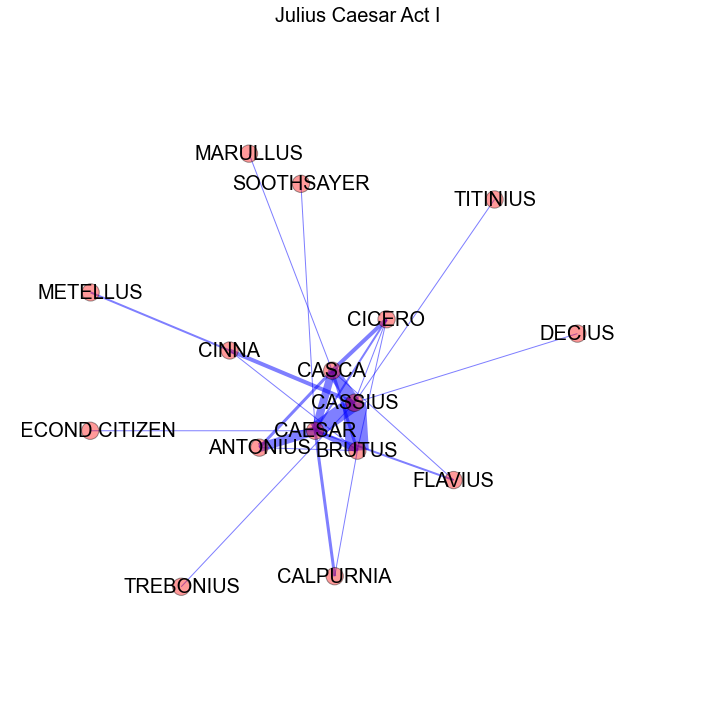

In [8]:
GI = graph_dic[ract_dic[cnum[0]]]
print "The number of actors in Julius Caesar's Act I is", len(GI.nodes())
print "The number of conversational relationships in Julius Caesar's Act I is", len(GI.edges())
import pickle
try:
    f=open('positions_of_JC_Shake.dmp')
    pos_dict=pickle.load(f)
except:
    pos_dict={}
    pos=nx.spring_layout(GI,scale=50)
    pos_dict[0]=pos
GI.remove_nodes_from(nx.isolates(GI))
labels={i:v for v,i in pernode_dict.items() if i in GI.nodes()}
weights={(i[0],i[1]):i[2]['weight'] for i in GI.edges(data=True) }#if all((i[0],i[1])) in G.nodes() }
plt.figure(figsize=(12,12))
# pos=nx.spring_layout(GI,scale=50)
# pos_dict[0]=pos
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(GI,pos=pos,with_labels=False,alpha=0.4)
labe=nx.draw_networkx_labels(GI,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(GI,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=0.2)
plt.title("Julius Caesar Act I",fontsize=20)
kk=plt.axis('off')

The number of actors in Julius Caesar's Act II is 47
The number of conversational relationships in Julius Caesar's Act II is 42


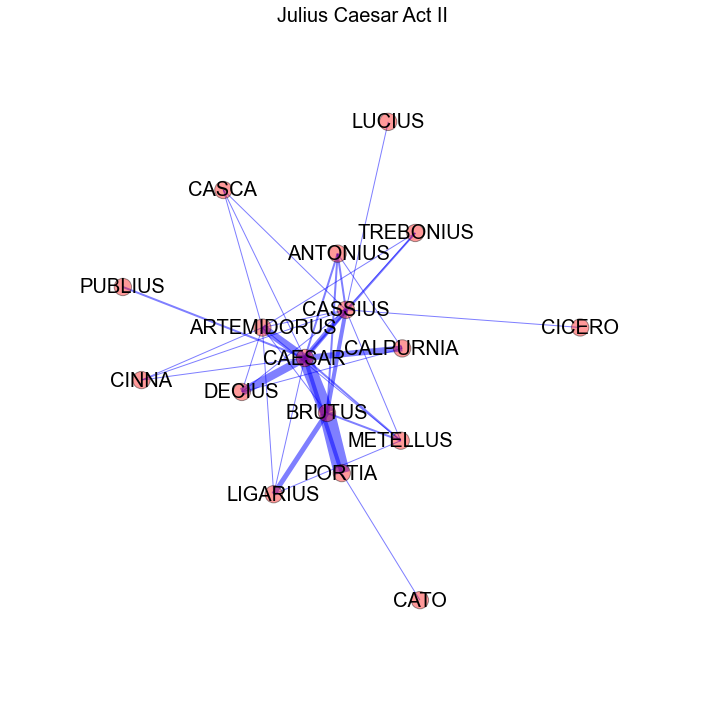

In [9]:
GI = graph_dic[ract_dic[cnum[1]]]
print "The number of actors in Julius Caesar's Act II is", len(GI.nodes())
print "The number of conversational relationships in Julius Caesar's Act II is", len(GI.edges())

GI.remove_nodes_from(nx.isolates(GI))
labels={i:v for v,i in pernode_dict.items() if i in GI.nodes()}
weights={(i[0],i[1]):i[2]['weight'] for i in GI.edges(data=True) }#if all((i[0],i[1])) in G.nodes() }
plt.figure(figsize=(12,12))
try:
    f=open('positions_of_JC_Shake.dmp')
    pos_dict=pickle.load(f)
    pos =pos_dict[1]
except:
    
    pos=nx.spring_layout(GI,scale=50)
    pos_dict[1]=pos
# pos=nx.spring_layout(GI,scale=50)
# pos_dict[1]=pos
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(GI,pos=pos,with_labels=False,alpha=0.4)
labe=nx.draw_networkx_labels(GI,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(GI,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=0.2)
plt.title("Julius Caesar Act II",fontsize=20)
kk=plt.axis('off')

The number of actors in Julius Caesar's Act III is 47
The number of conversational relationships in Julius Caesar's Act III is 64


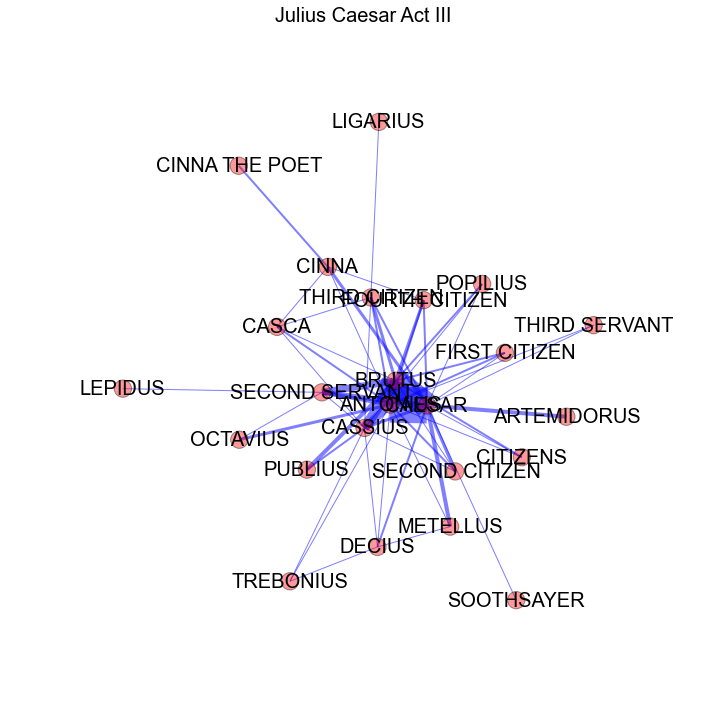

In [10]:
GI = graph_dic[ract_dic[cnum[2]]]
print "The number of actors in Julius Caesar's Act III is", len(GI.nodes())
print "The number of conversational relationships in Julius Caesar's Act III is", len(GI.edges())

GI.remove_nodes_from(nx.isolates(GI))
labels={i:v for v,i in pernode_dict.items() if i in GI.nodes()}
weights={(i[0],i[1]):i[2]['weight'] for i in GI.edges(data=True) }#if all((i[0],i[1])) in G.nodes() }
plt.figure(figsize=(12,12))
try:
    f=open('positions_of_JC_Shake.dmp')
    pos_dict=pickle.load(f)
    pos =pos_dict[2]
except:
    
    pos=nx.spring_layout(GI,scale=50)
    pos_dict[2]=pos
# pos=nx.spring_layout(GI,scale=50)
# pos_dict[2]=pos
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(GI,pos=pos,with_labels=False,alpha=0.4)
labe=nx.draw_networkx_labels(GI,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(GI,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=0.2)
plt.title("Julius Caesar Act III",fontsize=20)
kk=plt.axis('off')

The number of actors in Julius Caesar's Act IV is 47
The number of conversational relationships in Julius Caesar's Act IV is 34


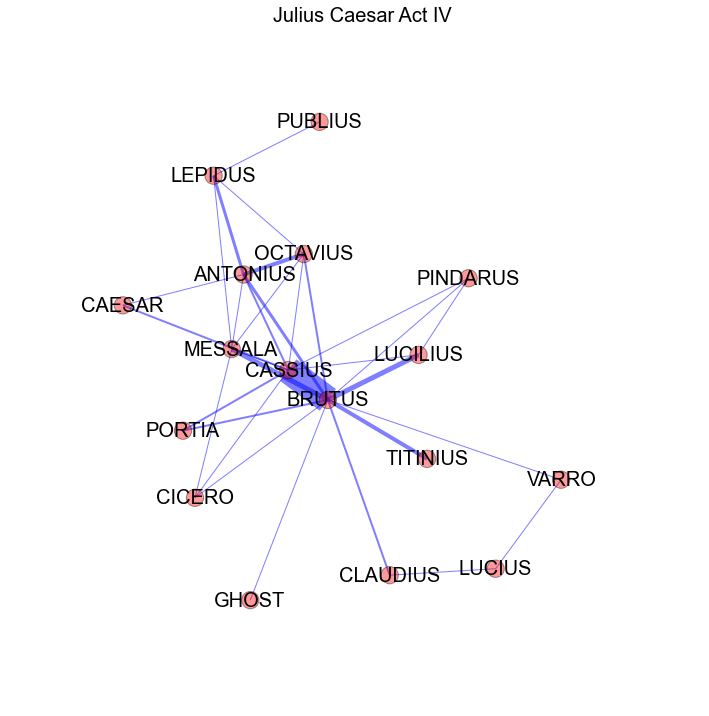

In [11]:
GI = graph_dic[ract_dic[cnum[3]]]
print "The number of actors in Julius Caesar's Act IV is", len(GI.nodes())
print "The number of conversational relationships in Julius Caesar's Act IV is", len(GI.edges())

GI.remove_nodes_from(nx.isolates(GI))
labels={i:v for v,i in pernode_dict.items() if i in GI.nodes()}
weights={(i[0],i[1]):i[2]['weight'] for i in GI.edges(data=True) }#if all((i[0],i[1])) in G.nodes() }
plt.figure(figsize=(12,12))
try:
    f=open('positions_of_JC_Shake.dmp')
    pos_dict=pickle.load(f)
    pos =pos_dict[3]
except:
    
    pos=nx.spring_layout(GI,scale=50)
    pos_dict[3]=pos
# pos=nx.spring_layout(GI,scale=50)
# pos_dict[3]=pos
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(GI,pos=pos,with_labels=False,alpha=0.4)
labe=nx.draw_networkx_labels(GI,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(GI,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=0.2)
plt.title("Julius Caesar Act IV",fontsize=20)
kk=plt.axis('off')

The number of actors in Julius Caesar's Act V is 47
The number of conversational relationships in Julius Caesar's Act V is 42


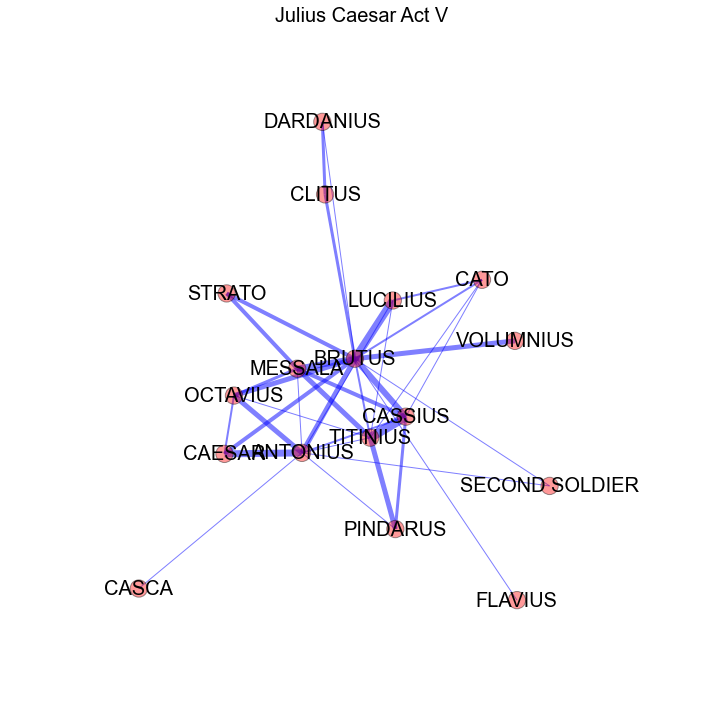

In [12]:
GI = graph_dic[ract_dic[cnum[4]]]
print "The number of actors in Julius Caesar's Act V is", len(GI.nodes())
print "The number of conversational relationships in Julius Caesar's Act V is", len(GI.edges())

GI.remove_nodes_from(nx.isolates(GI))
labels={i:v for v,i in pernode_dict.items() if i in GI.nodes()}
weights={(i[0],i[1]):i[2]['weight'] for i in GI.edges(data=True) }#if all((i[0],i[1])) in G.nodes() }
plt.figure(figsize=(12,12))
try:
    f=open('positions_of_JC_Shake.dmp')
    pos_dict=pickle.load(f)
    pos =pos_dict[4]
except:
    
    pos=nx.spring_layout(GI,scale=50)
    pos_dict[4]=pos
# pos=nx.spring_layout(GI,scale=50)
# pos_dict[4]=pos
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(GI,pos=pos,with_labels=False,alpha=0.4)
labe=nx.draw_networkx_labels(GI,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(GI,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=0.2)
plt.title("Julius Caesar Act V",fontsize=20)
kk=plt.axis('off')

The number of actors in Julius Caesar Network (all Acts) is 43
The number of conversational relationships in Julius Caesar Network (all Acts) is 149


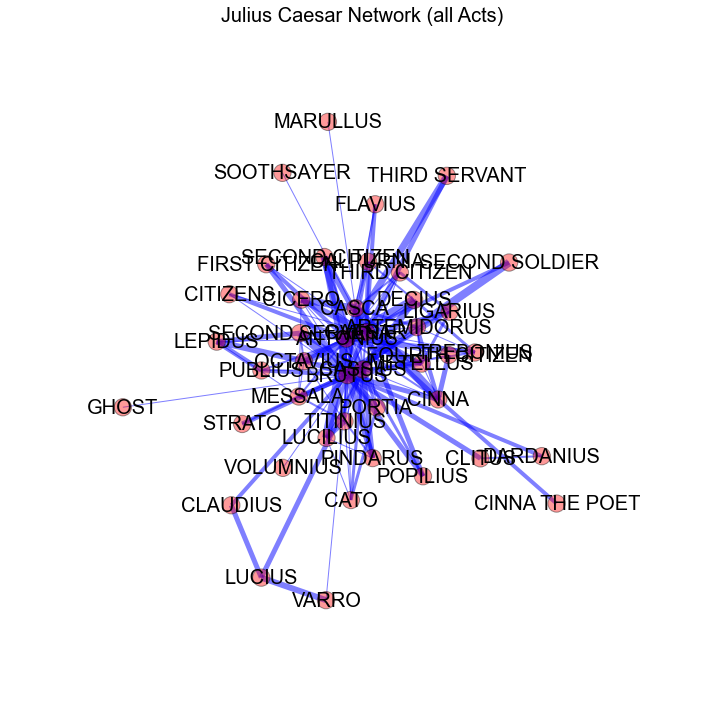

In [13]:
G=plot_total_graph_with_weights(graph_dic,nodper_dic)
weights={(nd[0],nd[1]):str(nd[2]['weight']) for nd in G.edges(data=True)}
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
print "The number of actors in Julius Caesar Network (all Acts) is", len(G.nodes())
print "The number of conversational relationships in Julius Caesar Network (all Acts) is", len(G.edges())

# print labels
plt.figure(figsize=(12,12))
# pos=nx.spring_layout(G,scale=50)
try:
    f=open('positions_of_JC_Shake.dmp')
    pos_dict=pickle.load(f)
    pos =pos_dict[5]
except:
    
    pos=nx.spring_layout(G,scale=50)
    pos_dict[5]=pos
    
# print pos

edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Julius Caesar Network (all Acts)",fontsize=20)
kk=plt.axis('off')


In [14]:
# Κάνε ένα ένα τα ποσ μέχρι εδώ και όταν τελειώσεις τρέξε και αυτό το κελί. Αν θες να το 
# ξαναλάξεις διέγραψε το 'positions_of_JC_Shake.dmp'

f=open('positions_of_JC_Shake.dmp','w')
pickle.dump(pos_dict,f)
f.close()
# pos_dict[5]=pos

f=open('positions_of_JC_Shake.dmp')
pos_dict=pickle.load(f)
f.close()

## Julius Caesar Network Centralities

### Degree Centrality

CAESAR has degree centrality 0.733333333333
CASSIUS has degree centrality 0.666666666667
CASCA has degree centrality 0.6
CICERO has degree centrality 0.266666666667
ANTONIUS has degree centrality 0.2
CALPURNIA has degree centrality 0.133333333333
SOOTHSAYER has degree centrality 0.0666666666667


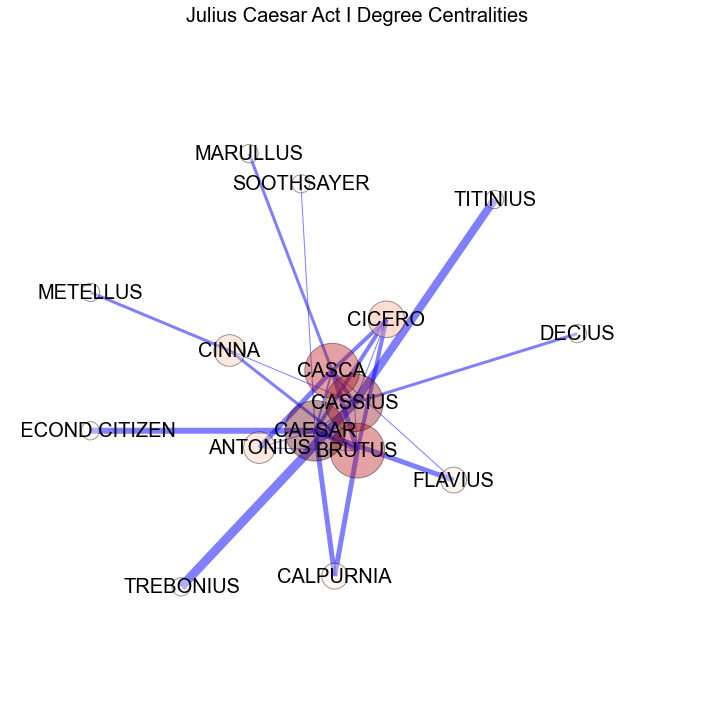

In [15]:
G = graph_dic[ract_dic[cnum[0]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
dc = nx.degree_centrality(G)
dcs={}
for k,v in dc.items():
    dcs[v]=k
for k in sorted(dcs,reverse=True):
    print labels[dcs[k]], 'has degree centrality', k
pos=pos_dict[0]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=dc.keys(),
                       node_size = [d*5000 for d in dc.values()],node_color=dc.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Julius Caesar Act I Degree Centralities",fontsize=20)
kk=plt.axis('off')

CAESAR has degree centrality 0.9375
CASSIUS has degree centrality 0.6875
BRUTUS has degree centrality 0.5625
METELLUS has degree centrality 0.3125
LIGARIUS has degree centrality 0.25
CALPURNIA has degree centrality 0.1875
PUBLIUS has degree centrality 0.0625


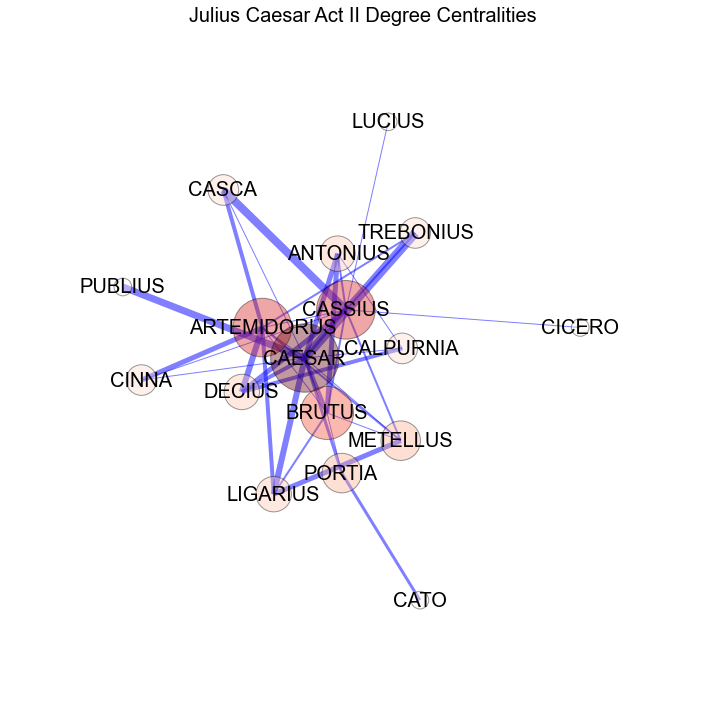

In [16]:
G = graph_dic[ract_dic[cnum[1]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
# dc = nx.degree_centrality(G)
# for k,v in dc.items():
#     print labels[k], 'has degree centrality', v
dc = nx.degree_centrality(G)
dcs={}
for k,v in dc.items():
    dcs[v]=k
for k in sorted(dcs,reverse=True):
    print labels[dcs[k]], 'has degree centrality', k
pos=pos_dict[1]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=dc.keys(),
                       node_size = [d*5000 for d in dc.values()],node_color=dc.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Julius Caesar Act II Degree Centralities",fontsize=20)
kk=plt.axis('off')

ANTONIUS has degree centrality 0.782608695652
BRUTUS has degree centrality 0.608695652174
CASSIUS has degree centrality 0.565217391304
CINNA has degree centrality 0.304347826087
THIRD CITIZEN has degree centrality 0.260869565217
METELLUS has degree centrality 0.217391304348
SECOND CITIZEN has degree centrality 0.173913043478
POPILIUS has degree centrality 0.130434782609
OCTAVIUS has degree centrality 0.0869565217391
SOOTHSAYER has degree centrality 0.0434782608696


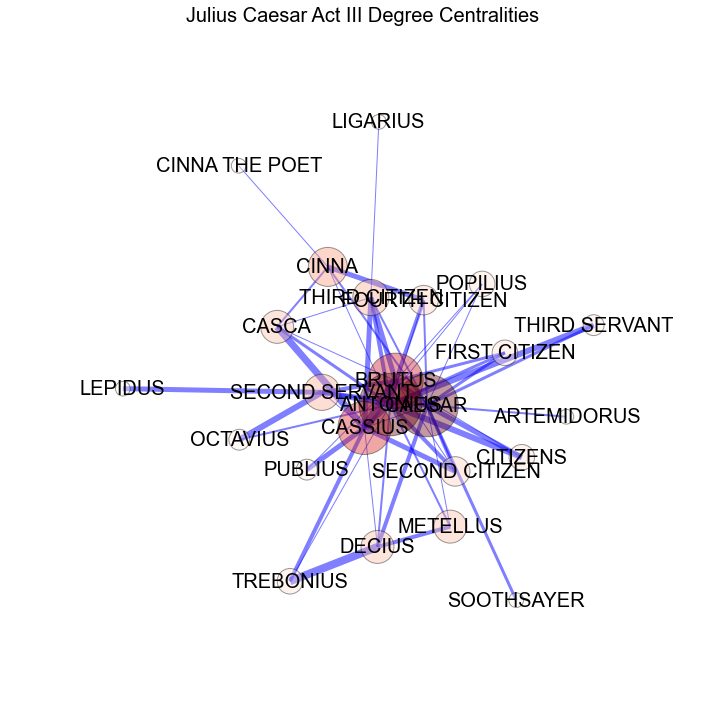

In [17]:
G = graph_dic[ract_dic[cnum[2]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
dc = nx.degree_centrality(G)
dcs={}
for k,v in dc.items():
    dcs[v]=k
for k in sorted(dcs,reverse=True):
    print labels[dcs[k]], 'has degree centrality', k
pos=pos_dict[2]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=dc.keys(),
                       node_size = [d*5000 for d in dc.values()],node_color=dc.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Julius Caesar Act III Degree Centralities",fontsize=20)
kk=plt.axis('off')

BRUTUS has degree centrality 0.875
CASSIUS has degree centrality 0.6875
MESSALA has degree centrality 0.375
OCTAVIUS has degree centrality 0.3125
LEPIDUS has degree centrality 0.25
LUCILIUS has degree centrality 0.1875
CAESAR has degree centrality 0.125
PUBLIUS has degree centrality 0.0625


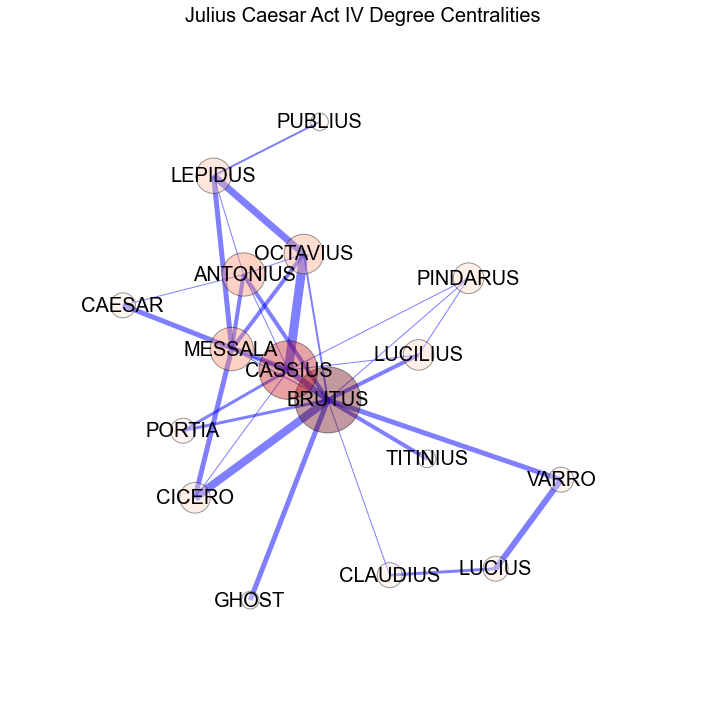

In [18]:
G = graph_dic[ract_dic[cnum[3]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
dc = nx.degree_centrality(G)
dcs={}
for k,v in dc.items():
    dcs[v]=k
for k in sorted(dcs,reverse=True):
    print labels[dcs[k]], 'has degree centrality', k
pos=pos_dict[3]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=dc.keys(),
                       node_size = [d*5000 for d in dc.values()],node_color=dc.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Julius Caesar Act IV Degree Centralities",fontsize=20)
kk=plt.axis('off')

BRUTUS has degree centrality 1.0
ANTONIUS has degree centrality 0.625
CASSIUS has degree centrality 0.5
LUCILIUS has degree centrality 0.375
PINDARUS has degree centrality 0.3125
CAESAR has degree centrality 0.1875
STRATO has degree centrality 0.125
VOLUMNIUS has degree centrality 0.0625


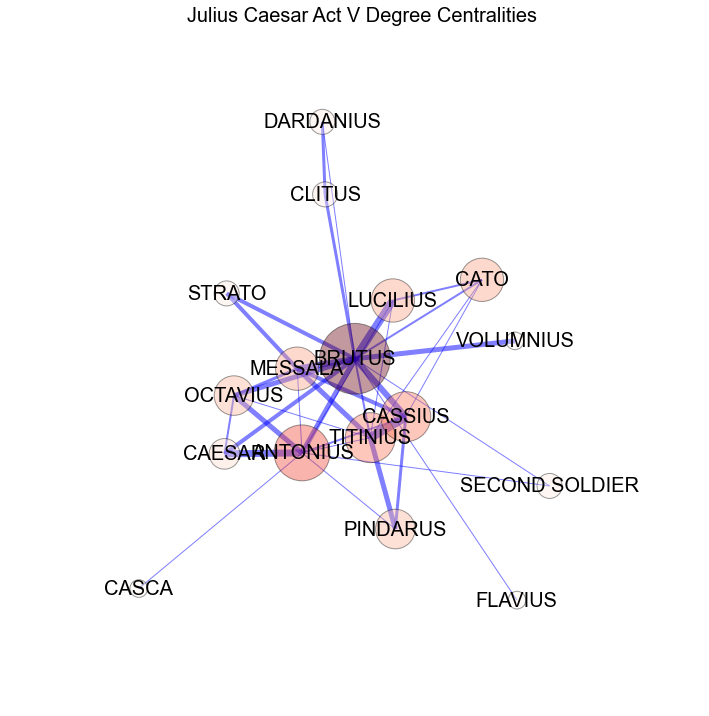

In [19]:
G = graph_dic[ract_dic[cnum[4]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
dc = nx.degree_centrality(G)
dcs={}
for k,v in dc.items():
    dcs[v]=k
for k in sorted(dcs,reverse=True):
    print labels[dcs[k]], 'has degree centrality', k
pos=pos_dict[4]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=dc.keys(),
                       node_size = [d*5000 for d in dc.values()],node_color=dc.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Julius Caesar Act V Degree Centralities",fontsize=20)
kk=plt.axis('off')

BRUTUS has degree centrality 0.857142857143
CAESAR has degree centrality 0.642857142857
ANTONIUS has degree centrality 0.595238095238
CASCA has degree centrality 0.285714285714
ARTEMIDORUS has degree centrality 0.261904761905
METELLUS has degree centrality 0.238095238095
OCTAVIUS has degree centrality 0.190476190476
CATO has degree centrality 0.166666666667
THIRD CITIZEN has degree centrality 0.142857142857
TREBONIUS has degree centrality 0.119047619048
SECOND CITIZEN has degree centrality 0.0952380952381
POPILIUS has degree centrality 0.0714285714286
SECOND SOLDIER has degree centrality 0.047619047619
SOOTHSAYER has degree centrality 0.0238095238095


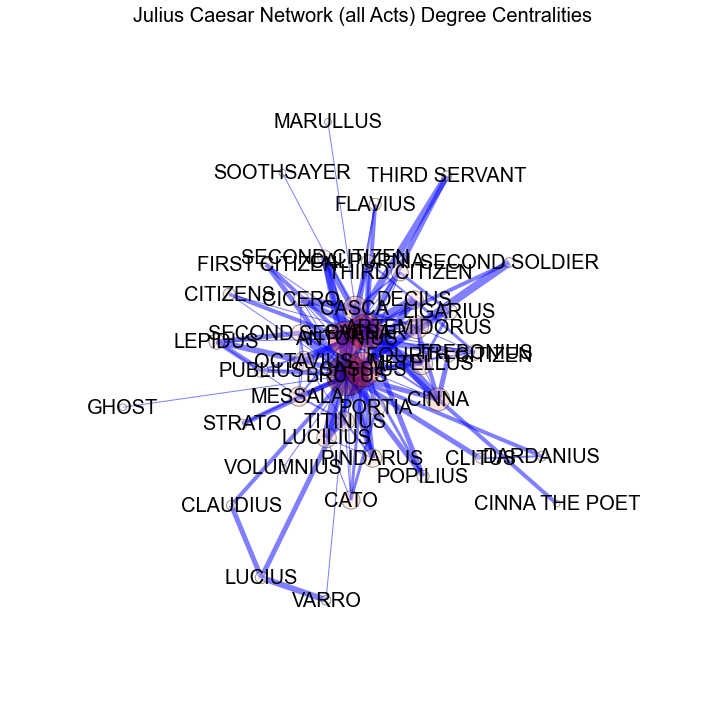

In [20]:
G=plot_total_graph_with_weights(graph_dic,nodper_dic)
weights={(nd[0],nd[1]):str(nd[2]['weight']) for nd in G.edges(data=True)}
# G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
dc = nx.degree_centrality(G)
dcs={}
for k,v in dc.items():
    dcs[v]=k
for k in sorted(dcs,reverse=True):
    print labels[dcs[k]], 'has degree centrality', k
pos=pos_dict[5]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=dc.keys(),
                       node_size = [d*2000 for d in dc.values()],node_color=dc.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Julius Caesar Network (all Acts) Degree Centralities",fontsize=20)
kk=plt.axis('off')

### Closeness Centrality

CASSIUS has closeness centrality 0.681818181818
BRUTUS has closeness centrality 0.652173913043
CASCA has closeness centrality 0.625
CICERO has closeness centrality 0.555555555556
ANTONIUS has closeness centrality 0.483870967742
CALPURNIA has closeness centrality 0.454545454545
FLAVIUS has closeness centrality 0.441176470588
SOOTHSAYER has closeness centrality 0.416666666667
MARULLUS has closeness centrality 0.394736842105
METELLUS has closeness centrality 0.333333333333


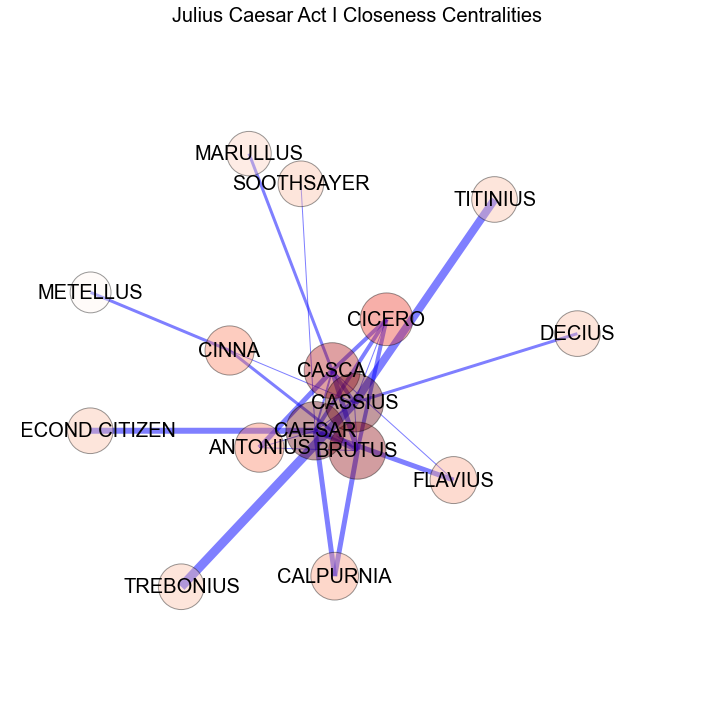

In [21]:
G = graph_dic[ract_dic[cnum[0]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
cl = nx.closeness_centrality(G)
cls={}
for k,v in cl.items():
    cls[v]=k
for k in sorted(cls,reverse=True):
    print labels[cls[k]], 'has closeness centrality', k
pos=pos_dict[0]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=cl.keys(),
                       node_size = [d*5000 for d in cl.values()],node_color=cl.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Julius Caesar Act I Closeness Centralities",fontsize=20)
kk=plt.axis('off')

CAESAR has closeness centrality 0.842105263158
CASSIUS has closeness centrality 0.727272727273
ARTEMIDORUS has closeness centrality 0.666666666667
BRUTUS has closeness centrality 0.64
METELLUS has closeness centrality 0.571428571429
DECIUS has closeness centrality 0.551724137931
CASCA has closeness centrality 0.533333333333
LIGARIUS has closeness centrality 0.516129032258
CALPURNIA has closeness centrality 0.5
PUBLIUS has closeness centrality 0.470588235294
LUCIUS has closeness centrality 0.432432432432
CATO has closeness centrality 0.347826086957


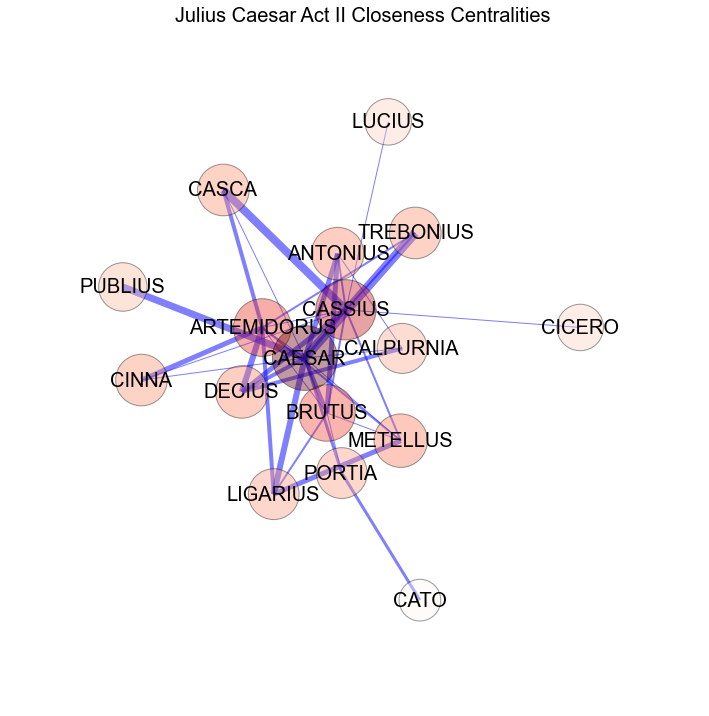

In [22]:
G = graph_dic[ract_dic[cnum[1]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
cl = nx.closeness_centrality(G)
cls={}
for k,v in cl.items():
    cls[v]=k
for k in sorted(cls,reverse=True):
    print labels[cls[k]], 'has closeness centrality', k
pos=pos_dict[1]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=cl.keys(),
                       node_size = [d*5000 for d in cl.values()],node_color=cl.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Julius Caesar Act II Closeness Centralities",fontsize=20)
kk=plt.axis('off')

ANTONIUS has closeness centrality 0.766666666667
BRUTUS has closeness centrality 0.657142857143
CASSIUS has closeness centrality 0.638888888889
THIRD CITIZEN has closeness centrality 0.547619047619
CINNA has closeness centrality 0.522727272727
SECOND CITIZEN has closeness centrality 0.511111111111
CITIZENS has closeness centrality 0.5
POPILIUS has closeness centrality 0.489361702128
TREBONIUS has closeness centrality 0.479166666667
OCTAVIUS has closeness centrality 0.46
SOOTHSAYER has closeness centrality 0.442307692308
PUBLIUS has closeness centrality 0.425925925926
LEPIDUS has closeness centrality 0.359375
CINNA THE POET has closeness centrality 0.348484848485


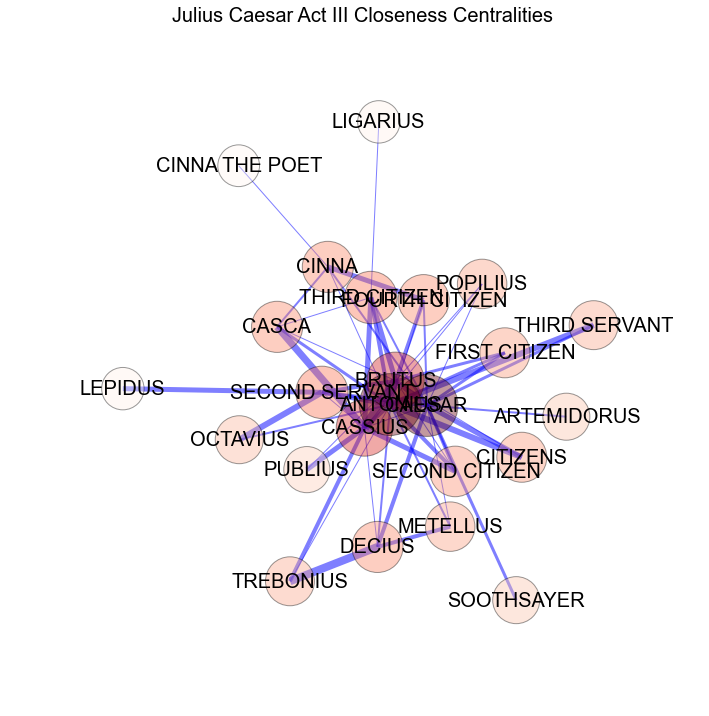

In [23]:
G = graph_dic[ract_dic[cnum[2]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
cl = nx.closeness_centrality(G)
cls={}
for k,v in cl.items():
    cls[v]=k
for k in sorted(cls,reverse=True):
    print labels[cls[k]], 'has closeness centrality', k
pos=pos_dict[2]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=cl.keys(),
                       node_size = [d*5000 for d in cl.values()],node_color=cl.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Julius Caesar Act III Closeness Centralities",fontsize=20)
kk=plt.axis('off')

PORTIA has closeness centrality 0.470588235294
CLAUDIUS has closeness centrality 0.470588235294
OCTAVIUS has closeness centrality 0.571428571429
ANTONIUS has closeness centrality 0.592592592593
VARRO has closeness centrality 0.470588235294
MESSALA has closeness centrality 0.592592592593
BRUTUS has closeness centrality 0.761904761905
TITINIUS has closeness centrality 0.444444444444
CICERO has closeness centrality 0.516129032258
LUCIUS has closeness centrality 0.340425531915
PINDARUS has closeness centrality 0.484848484848
CAESAR has closeness centrality 0.432432432432
LUCILIUS has closeness centrality 0.484848484848
GHOST has closeness centrality 0.444444444444
CASSIUS has closeness centrality 0.64
LEPIDUS has closeness centrality 0.432432432432
PUBLIUS has closeness centrality 0.307692307692


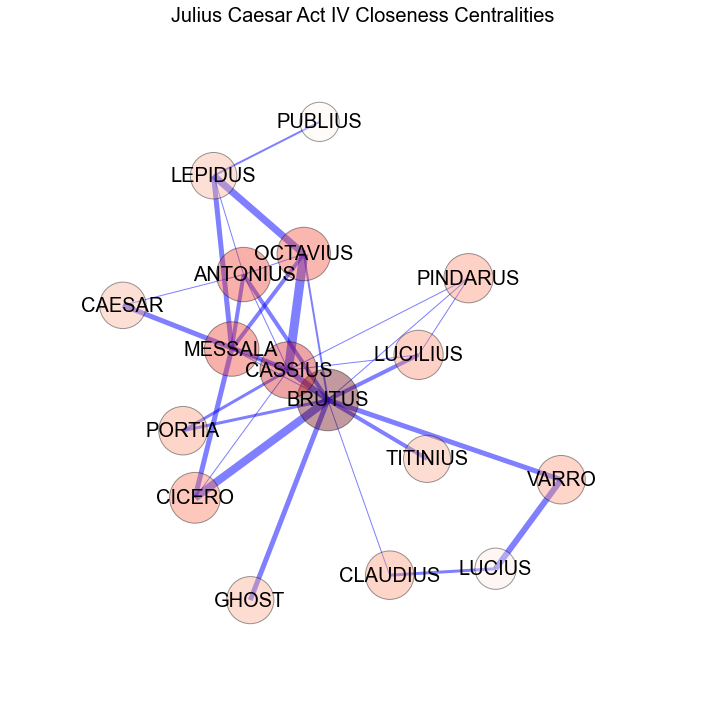

In [24]:
G = graph_dic[ract_dic[cnum[3]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
cl = nx.closeness_centrality(G)
for k,v in cl.items():
    print labels[k], 'has closeness centrality', v
# pos=nx.spring_layout(G,scale=50)
pos=pos_dict[3]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=cl.keys(),
                       node_size = [d*5000 for d in cl.values()],node_color=cl.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Julius Caesar Act IV Closeness Centralities",fontsize=20)
kk=plt.axis('off')

BRUTUS has closeness centrality 0.888888888889
ANTONIUS has closeness centrality 0.727272727273
TITINIUS has closeness centrality 0.666666666667
CASSIUS has closeness centrality 0.615384615385
OCTAVIUS has closeness centrality 0.592592592593
LUCILIUS has closeness centrality 0.571428571429
CAESAR has closeness centrality 0.551724137931
SECOND SOLDIER has closeness centrality 0.533333333333
STRATO has closeness centrality 0.5
VOLUMNIUS has closeness centrality 0.484848484848
PINDARUS has closeness centrality 0.470588235294
CASCA has closeness centrality 0.432432432432


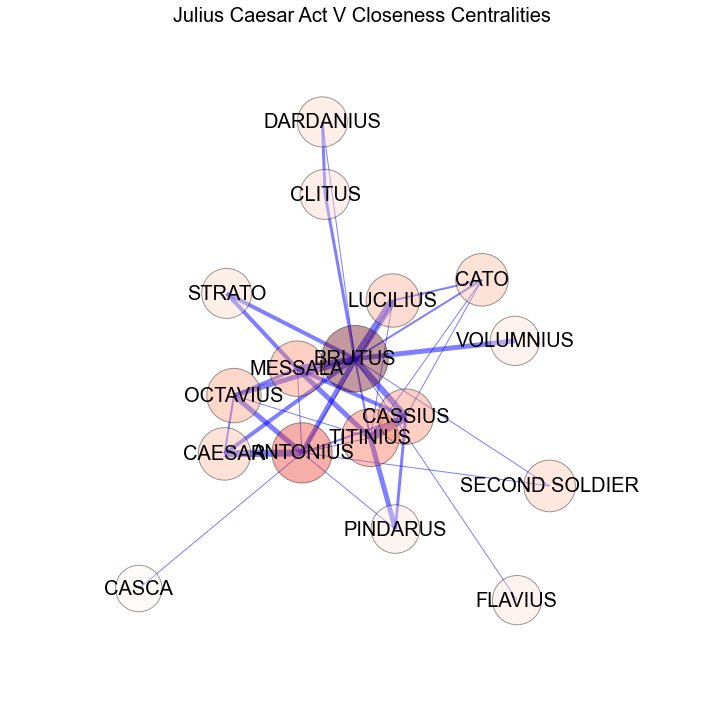

In [25]:
G = graph_dic[ract_dic[cnum[4]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
cl = nx.closeness_centrality(G)
cls={}
for k,v in cl.items():
    cls[v]=k
for k in sorted(cls,reverse=True):
    print labels[cls[k]], 'has closeness centrality', k
pos=pos_dict[4]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=cl.keys(),
                       node_size = [d*5000 for d in cl.values()],node_color=cl.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Julius Caesar Act V Closeness Centralities",fontsize=20)
kk=plt.axis('off')

BRUTUS has closeness centrality 0.84
CAESAR has closeness centrality 0.71186440678
ANTONIUS has closeness centrality 0.688524590164
CASCA has closeness centrality 0.567567567568
CINNA has closeness centrality 0.56
ARTEMIDORUS has closeness centrality 0.552631578947
METELLUS has closeness centrality 0.545454545455
OCTAVIUS has closeness centrality 0.538461538462
THIRD CITIZEN has closeness centrality 0.53164556962
CICERO has closeness centrality 0.525
LUCILIUS has closeness centrality 0.518518518519
SECOND CITIZEN has closeness centrality 0.512195121951
CALPURNIA has closeness centrality 0.506024096386
POPILIUS has closeness centrality 0.5
SECOND SOLDIER has closeness centrality 0.488372093023
TREBONIUS has closeness centrality 0.477272727273
STRATO has closeness centrality 0.47191011236
DARDANIUS has closeness centrality 0.466666666667
VOLUMNIUS has closeness centrality 0.461538461538
THIRD SERVANT has closeness centrality 0.451612903226
LEPIDUS has closeness centrality 0.442105263158


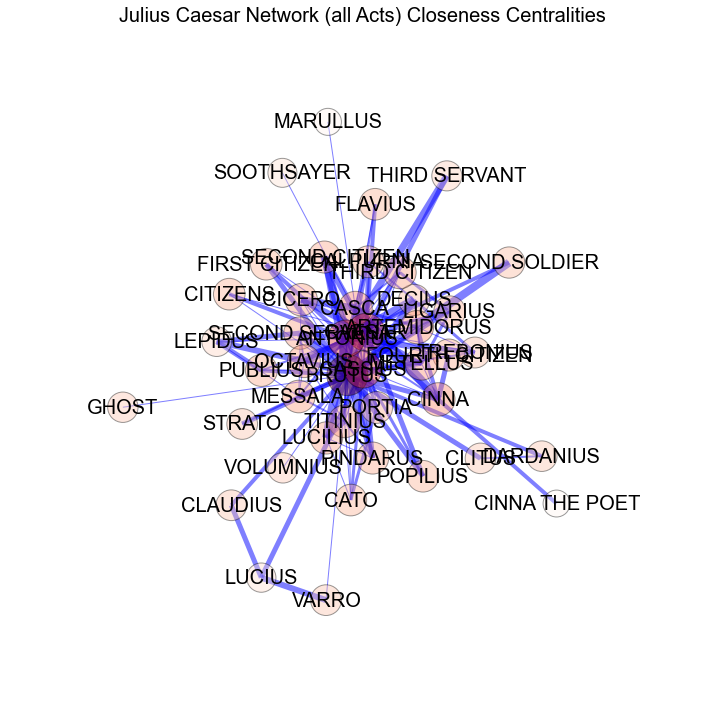

In [26]:
G=plot_total_graph_with_weights(graph_dic,nodper_dic)
weights={(nd[0],nd[1]):str(nd[2]['weight']) for nd in G.edges(data=True)}
# G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
cl = nx.closeness_centrality(G)
cls={}
for k,v in cl.items():
    cls[v]=k
for k in sorted(cls,reverse=True):
    print labels[cls[k]], 'has closeness centrality', k
pos=pos_dict[5]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=cl.keys(),
                       node_size = [d*2000 for d in cl.values()],node_color=cl.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Julius Caesar Network (all Acts) Closeness Centralities",fontsize=20)
kk=plt.axis('off')

### Betweenness Centrality

CASSIUS has betweenness centrality 0.438095238095
CAESAR has betweenness centrality 0.363492063492
CASCA has betweenness centrality 0.192063492063
BRUTUS has betweenness centrality 0.15873015873
CINNA has betweenness centrality 0.133333333333
CALPURNIA has betweenness centrality 0.0


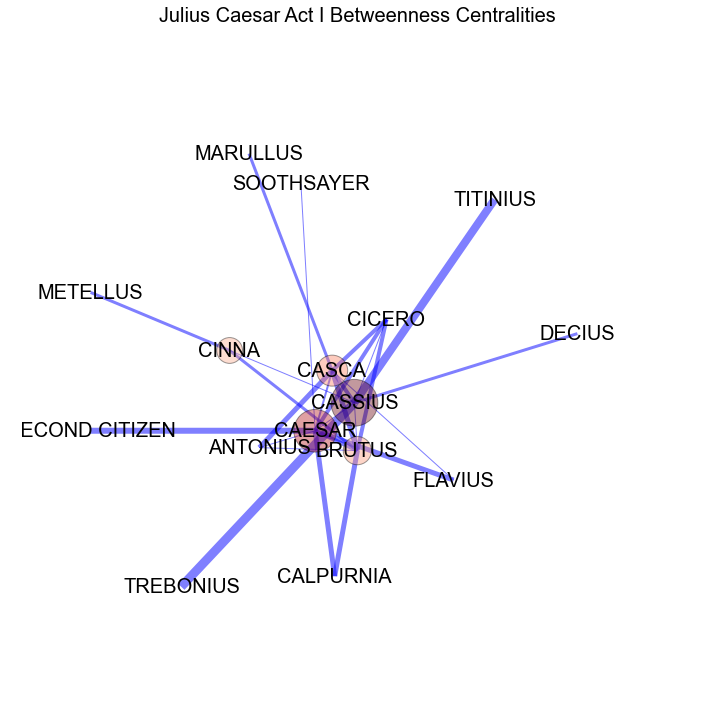

In [27]:
G = graph_dic[ract_dic[cnum[0]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
bc = nx.betweenness_centrality(G)
bcs={}
for k,v in bc.items():
    bcs[v]=k
for k in sorted(bcs,reverse=True):
    print labels[bcs[k]], 'has betweenness centrality', k
pos=pos_dict[0]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=bc.keys(),
                       node_size = [d*5000 for d in bc.values()],node_color=bc.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Julius Caesar Act I Betweenness Centralities",fontsize=20)
kk=plt.axis('off')

CAESAR has betweenness centrality 0.411805555556
CASSIUS has betweenness centrality 0.301388888889
PORTIA has betweenness centrality 0.125
BRUTUS has betweenness centrality 0.0743055555556
ARTEMIDORUS has betweenness centrality 0.0618055555556
DECIUS has betweenness centrality 0.0125
METELLUS has betweenness centrality 0.00625
CALPURNIA has betweenness centrality 0.00277777777778
PUBLIUS has betweenness centrality 0.0


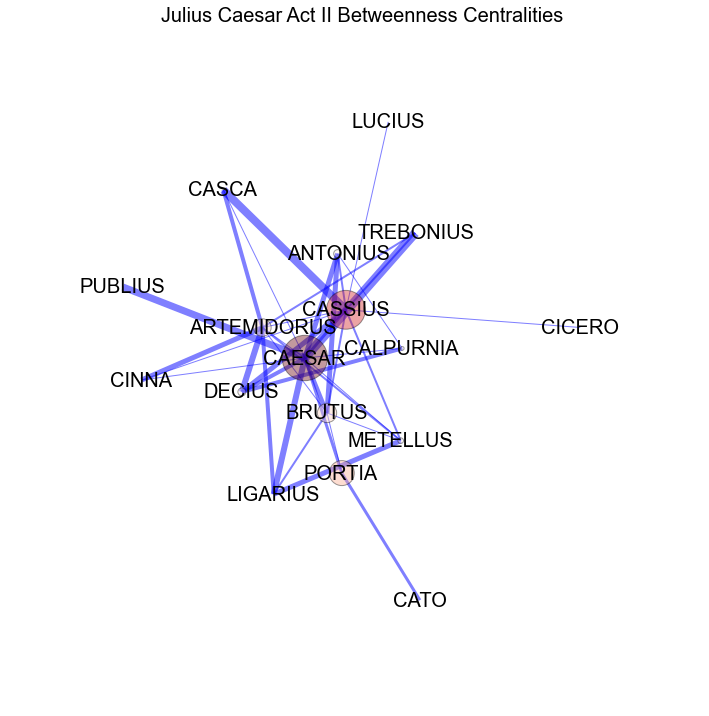

In [28]:
G = graph_dic[ract_dic[cnum[1]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
bc = nx.betweenness_centrality(G)
bcs={}
for k,v in bc.items():
    bcs[v]=k
for k in sorted(bcs,reverse=True):
    print labels[bcs[k]], 'has betweenness centrality', k
pos=pos_dict[1]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=bc.keys(),
                       node_size = [d*5000 for d in bc.values()],node_color=bc.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Julius Caesar Act II Betweenness Centralities",fontsize=20)
kk=plt.axis('off')

CAESAR has betweenness centrality 0.342443064182
ANTONIUS has betweenness centrality 0.269715791455
BRUTUS has betweenness centrality 0.107942781856
SECOND SERVANT has betweenness centrality 0.100790513834
CASSIUS has betweenness centrality 0.0983813288161
CINNA has betweenness centrality 0.0906455862978
THIRD CITIZEN has betweenness centrality 0.0893280632411
CASCA has betweenness centrality 0.0121400338792
DECIUS has betweenness centrality 0.00803689064559
FOURTH CITIZEN has betweenness centrality 0.00310559006211
SOOTHSAYER has betweenness centrality 0.0


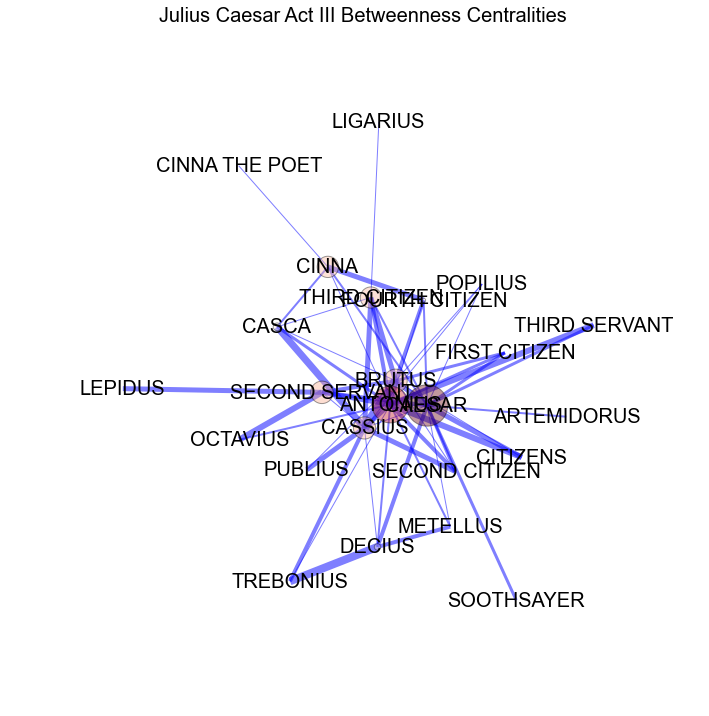

In [29]:
G = graph_dic[ract_dic[cnum[2]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
bc = nx.betweenness_centrality(G)
bcs={}
for k,v in bc.items():
    bcs[v]=k
for k in sorted(bcs,reverse=True):
    print labels[bcs[k]], 'has betweenness centrality', k
pos=pos_dict[2]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=bc.keys(),
                       node_size = [d*5000 for d in bc.values()],node_color=bc.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Julius Caesar Act III Betweenness Centralities",fontsize=20)
kk=plt.axis('off')

BRUTUS has betweenness centrality 0.609722222222
CASSIUS has betweenness centrality 0.155555555556
LEPIDUS has betweenness centrality 0.125
ANTONIUS has betweenness centrality 0.105555555556
MESSALA has betweenness centrality 0.0777777777778
VARRO has betweenness centrality 0.0583333333333
OCTAVIUS has betweenness centrality 0.0555555555556
LUCIUS has betweenness centrality 0.00416666666667
PUBLIUS has betweenness centrality 0.0


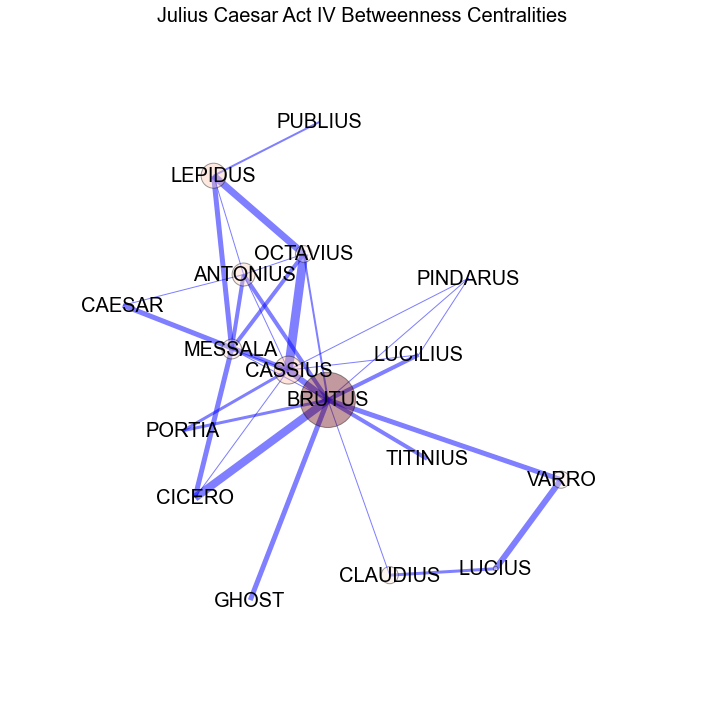

In [30]:
G = graph_dic[ract_dic[cnum[3]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
bc = nx.betweenness_centrality(G)
bcs={}
for k,v in bc.items():
    bcs[v]=k
for k in sorted(bcs,reverse=True):
    print labels[bcs[k]], 'has betweenness centrality', k
pos=pos_dict[3]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=bc.keys(),
                       node_size = [d*5000 for d in bc.values()],node_color=bc.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Julius Caesar Act IV Betweenness Centralities",fontsize=20)
kk=plt.axis('off')

BRUTUS has betweenness centrality 0.576388888889
ANTONIUS has betweenness centrality 0.218055555556
TITINIUS has betweenness centrality 0.0527777777778
CASSIUS has betweenness centrality 0.0305555555556
MESSALA has betweenness centrality 0.0270833333333
OCTAVIUS has betweenness centrality 0.00555555555556
LUCILIUS has betweenness centrality 0.00416666666667
CATO has betweenness centrality 0.00208333333333
VOLUMNIUS has betweenness centrality 0.0


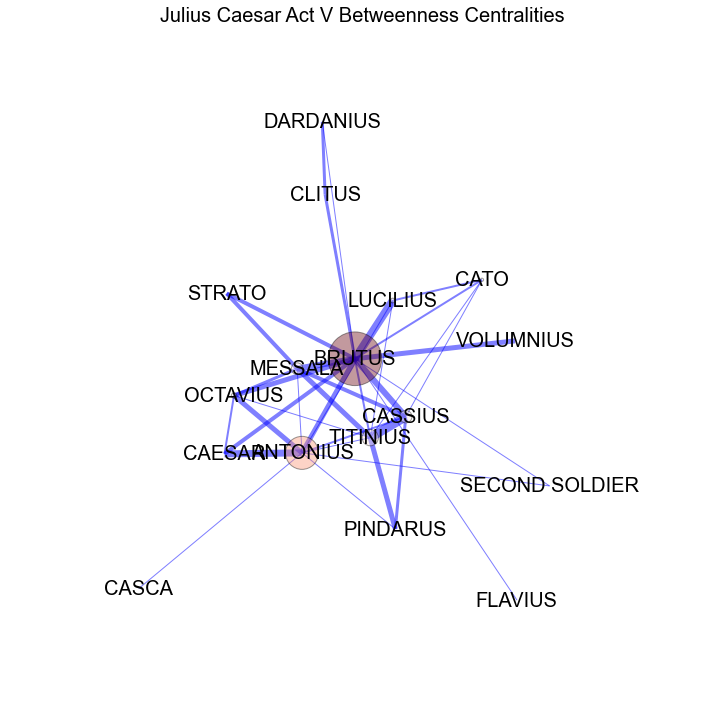

In [31]:
G = graph_dic[ract_dic[cnum[4]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
bc = nx.betweenness_centrality(G)
bcs={}
for k,v in bc.items():
    bcs[v]=k
for k in sorted(bcs,reverse=True):
    print labels[bcs[k]], 'has betweenness centrality', k
pos=pos_dict[4]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=bc.keys(),
                       node_size = [d*5000 for d in bc.values()],node_color=bc.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Julius Caesar Act V Betweenness Centralities",fontsize=20)
kk=plt.axis('off')

BRUTUS has betweenness centrality 0.456979523828
CAESAR has betweenness centrality 0.166031050067
ANTONIUS has betweenness centrality 0.12743645091
CASSIUS has betweenness centrality 0.122626033725
CASCA has betweenness centrality 0.0529744075636
CINNA has betweenness centrality 0.0499546630805
MESSALA has betweenness centrality 0.0108937347063
ARTEMIDORUS has betweenness centrality 0.0089085227587
OCTAVIUS has betweenness centrality 0.0059998877989
PUBLIUS has betweenness centrality 0.00396183680614
METELLUS has betweenness centrality 0.00387779182938
VARRO has betweenness centrality 0.00376638460262
TITINIUS has betweenness centrality 0.00293125380233
LUCIUS has betweenness centrality 0.00253857640617
DECIUS has betweenness centrality 0.00198718340567
LEPIDUS has betweenness centrality 0.00149051490515
CALPURNIA has betweenness centrality 0.00144488689785
THIRD CITIZEN has betweenness centrality 0.00137487367453
CICERO has betweenness centrality 0.00104529616725
PORTIA has betweennes

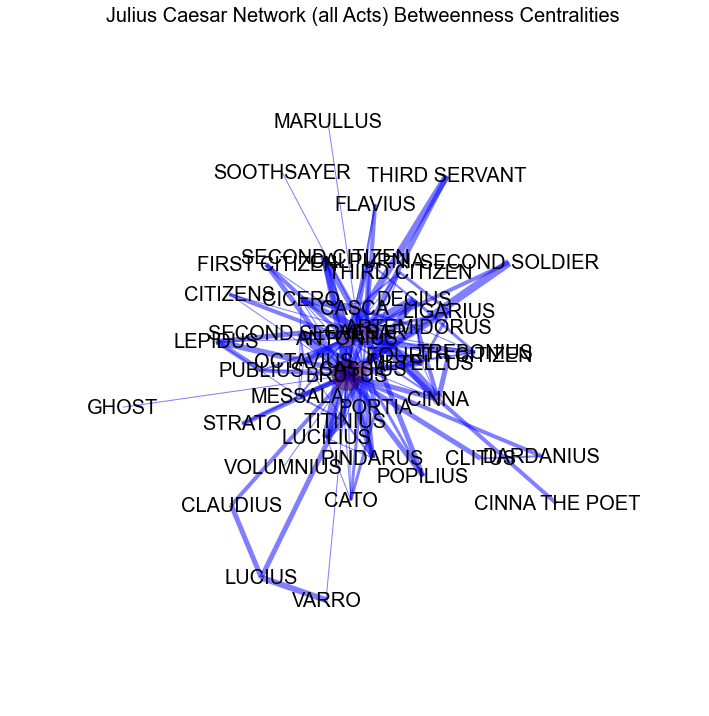

In [32]:
G=plot_total_graph_with_weights(graph_dic,nodper_dic)
weights={(nd[0],nd[1]):str(nd[2]['weight']) for nd in G.edges(data=True)}
# G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
bc = nx.betweenness_centrality(G)
bcs={}
for k,v in bc.items():
    bcs[v]=k
for k in sorted(bcs,reverse=True):
    print labels[bcs[k]], 'has betweenness centrality', k
pos=pos_dict[5]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=bc.keys(),
                       node_size = [d*2000 for d in bc.values()],node_color=bc.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Julius Caesar Network (all Acts) Betweenness Centralities",fontsize=20)
kk=plt.axis('off')

### Eigenvector Centrality

CASSIUS has eigenvector centrality 0.638023856184
BRUTUS has eigenvector centrality 0.483062086883
CAESAR has eigenvector centrality 0.449788215705
CASCA has eigenvector centrality 0.347081341517
ANTONIUS has eigenvector centrality 0.139629912226
CICERO has eigenvector centrality 0.0854205691361
CINNA has eigenvector centrality 0.0762452741094
CALPURNIA has eigenvector centrality 0.0459158441718
FLAVIUS has eigenvector centrality 0.0312380226847
TITINIUS has eigenvector centrality 0.0159873799957
SOOTHSAYER has eigenvector centrality 0.0112705273078
MARULLUS has eigenvector centrality 0.00869696806908
METELLUS has eigenvector centrality 0.00382100852807


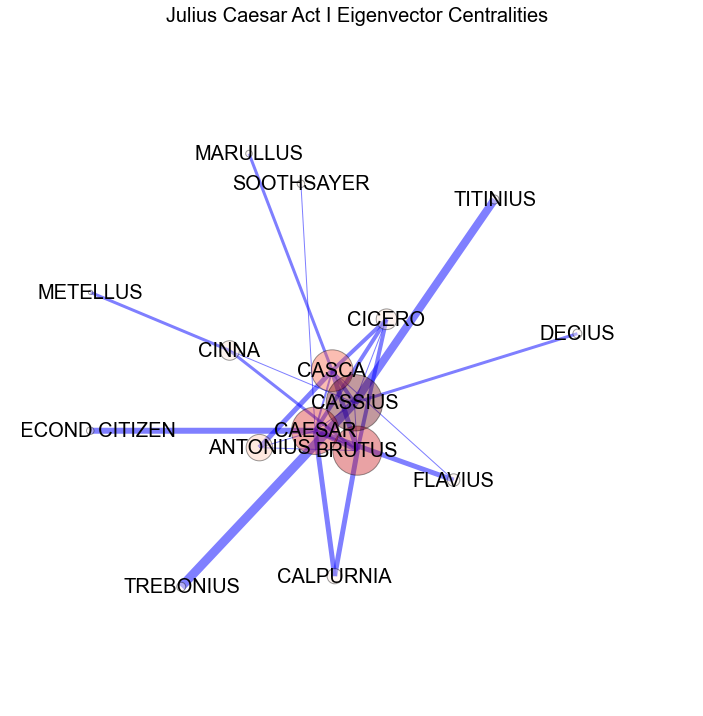

In [33]:
G = graph_dic[ract_dic[cnum[0]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
ec = nx.eigenvector_centrality(G)
ecs={}
for k,v in ec.items():
    ecs[v]=k
for k in sorted(ecs,reverse=True):
    print labels[ecs[k]], 'has eigenvector centrality', k
pos=pos_dict[0]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=ec.keys(),
                       node_size = [d*5000 for d in ec.values()],node_color=ec.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Julius Caesar Act I Eigenvector Centralities",fontsize=20)
kk=plt.axis('off')

CAESAR has eigenvector centrality 0.671205888956
BRUTUS has eigenvector centrality 0.521601998489
PORTIA has eigenvector centrality 0.343942332449
ARTEMIDORUS has eigenvector centrality 0.204626449899
CASSIUS has eigenvector centrality 0.187756318775
DECIUS has eigenvector centrality 0.177991150609
CALPURNIA has eigenvector centrality 0.129680099379
LIGARIUS has eigenvector centrality 0.107883239595
ANTONIUS has eigenvector centrality 0.0873329835002
METELLUS has eigenvector centrality 0.0871841233888
TREBONIUS has eigenvector centrality 0.0524089276902
PUBLIUS has eigenvector centrality 0.0405548327171
CASCA has eigenvector centrality 0.0321315113316
CATO has eigenvector centrality 0.0103905700366
LUCIUS has eigenvector centrality 0.00567220131594


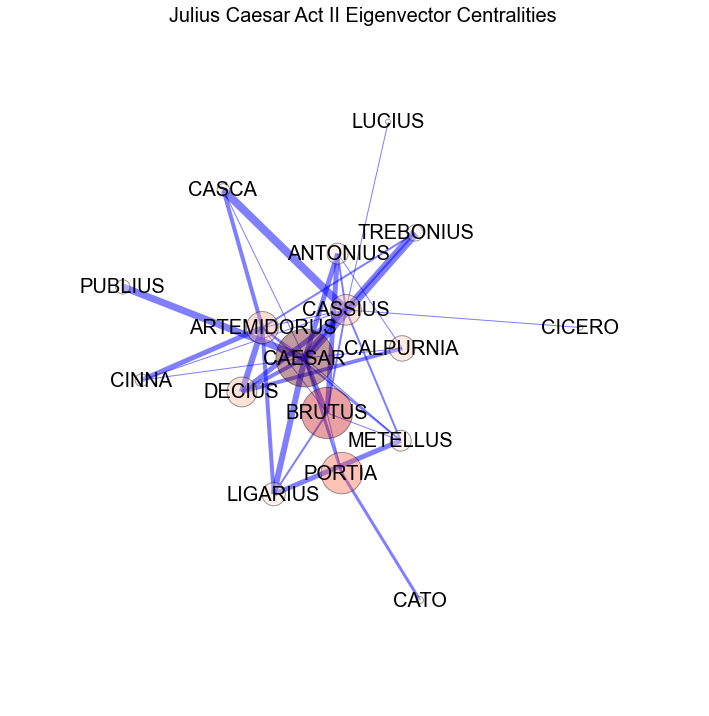

In [34]:
G = graph_dic[ract_dic[cnum[1]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
ec = nx.eigenvector_centrality(G)
ecs={}
for k,v in ec.items():
    ecs[v]=k
for k in sorted(ecs,reverse=True):
    print labels[ecs[k]], 'has eigenvector centrality', k
pos=pos_dict[1]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=ec.keys(),
                       node_size = [d*5000 for d in ec.values()],node_color=ec.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Julius Caesar Act II Eigenvector Centralities",fontsize=20)
kk=plt.axis('off')

ANTONIUS has eigenvector centrality 0.576087695099
CAESAR has eigenvector centrality 0.56665849873
BRUTUS has eigenvector centrality 0.523782947943
CASSIUS has eigenvector centrality 0.182349968188
SECOND SERVANT has eigenvector centrality 0.133379931719
THIRD CITIZEN has eigenvector centrality 0.0601954996528
FOURTH CITIZEN has eigenvector centrality 0.057582350326
SECOND CITIZEN has eigenvector centrality 0.0526402007779
METELLUS has eigenvector centrality 0.0431180541199
FIRST CITIZEN has eigenvector centrality 0.0409254894665
PUBLIUS has eigenvector centrality 0.0363899875723
CINNA has eigenvector centrality 0.0355071479559
ARTEMIDORUS has eigenvector centrality 0.0335315460957
CITIZENS has eigenvector centrality 0.0324028731694
CASCA has eigenvector centrality 0.0289073480013
DECIUS has eigenvector centrality 0.0287961865505
OCTAVIUS has eigenvector centrality 0.0275410423337
POPILIUS has eigenvector centrality 0.0265778803101
THIRD SERVANT has eigenvector centrality 0.01690550282

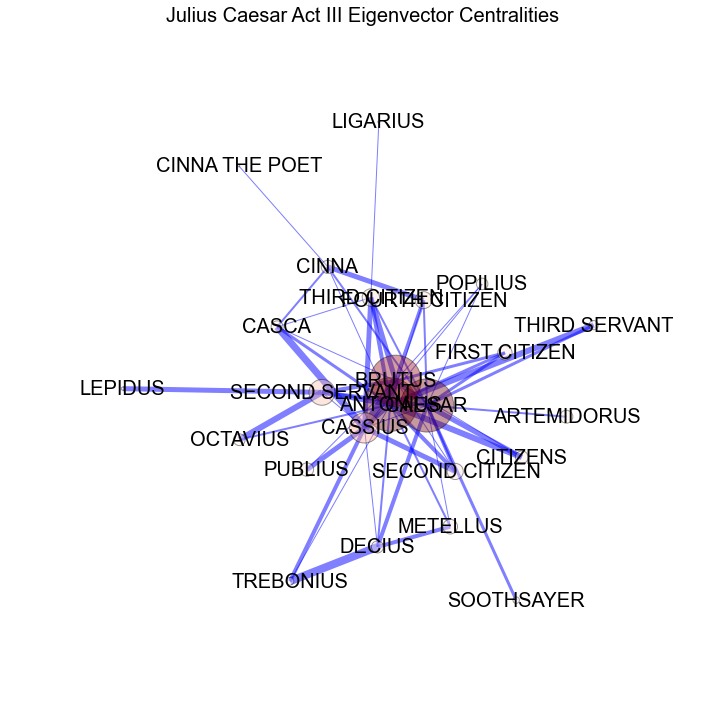

In [35]:
G = graph_dic[ract_dic[cnum[2]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
ec = nx.eigenvector_centrality(G)
ecs={}
for k,v in ec.items():
    ecs[v]=k
for k in sorted(ecs,reverse=True):
    print labels[ecs[k]], 'has eigenvector centrality', k
pos=pos_dict[2]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=ec.keys(),
                       node_size = [d*5000 for d in ec.values()],node_color=ec.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Julius Caesar Act III Eigenvector Centralities",fontsize=20)
kk=plt.axis('off')

BRUTUS has eigenvector centrality 0.681036861939
CASSIUS has eigenvector centrality 0.676486062503
MESSALA has eigenvector centrality 0.133558264686
LUCILIUS has eigenvector centrality 0.126748110634
ANTONIUS has eigenvector centrality 0.121525271319
TITINIUS has eigenvector centrality 0.0836584734567
PORTIA has eigenvector centrality 0.0833795925242
OCTAVIUS has eigenvector centrality 0.0821821566309
CICERO has eigenvector centrality 0.0457914246117
PINDARUS has eigenvector centrality 0.0455822837486
CAESAR has eigenvector centrality 0.0452824286526
CLAUDIUS has eigenvector centrality 0.0418885231698
VARRO has eigenvector centrality 0.0209739048057
GHOST has eigenvector centrality 0.0209146183642
LEPIDUS has eigenvector centrality 0.017838506928
LUCIUS has eigenvector centrality 0.00193053785214
PUBLIUS has eigenvector centrality 0.000547822227941


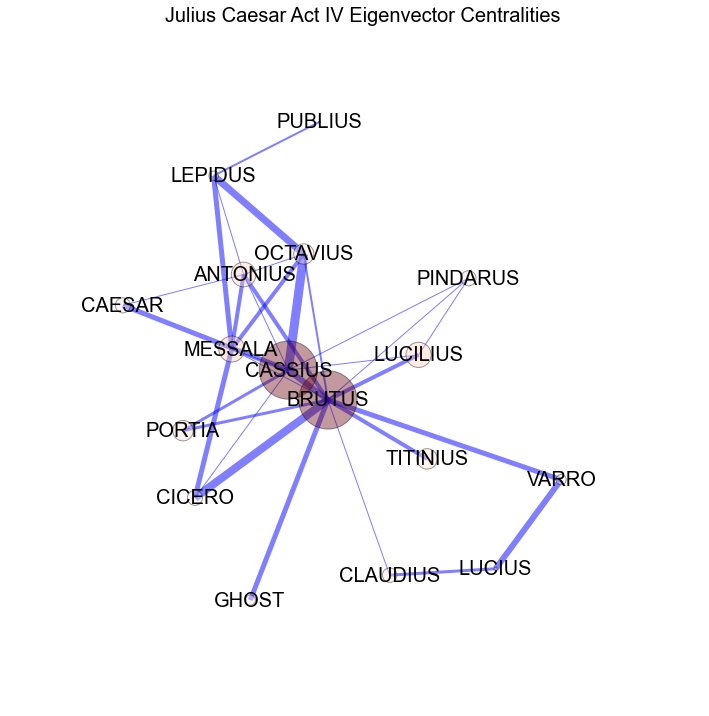

In [36]:
G = graph_dic[ract_dic[cnum[3]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
ec = nx.eigenvector_centrality(G,max_iter=1000)
ecs={}
for k,v in ec.items():
    ecs[v]=k
for k in sorted(ecs,reverse=True):
    print labels[ecs[k]], 'has eigenvector centrality', k
pos=pos_dict[3]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=ec.keys(),
                       node_size = [d*5000 for d in ec.values()],node_color=ec.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Julius Caesar Act IV Eigenvector Centralities",fontsize=20)
kk=plt.axis('off')

BRUTUS has eigenvector centrality 0.577352241577
CASSIUS has eigenvector centrality 0.383472431776
MESSALA has eigenvector centrality 0.33188557033
TITINIUS has eigenvector centrality 0.314900434083
ANTONIUS has eigenvector centrality 0.296276176395
OCTAVIUS has eigenvector centrality 0.245947681934
LUCILIUS has eigenvector centrality 0.229325002418
CAESAR has eigenvector centrality 0.197422396286
STRATO has eigenvector centrality 0.147278060044
PINDARUS has eigenvector centrality 0.127506283001
VOLUMNIUS has eigenvector centrality 0.116899488297
CATO has eigenvector centrality 0.101862951763
CLITUS has eigenvector centrality 0.0740731810974
SECOND SOLDIER has eigenvector centrality 0.0353775618848
DARDANIUS has eigenvector centrality 0.0323785687259
FLAVIUS has eigenvector centrality 0.0233798976594
CASCA has eigenvector centrality 0.0119976642254


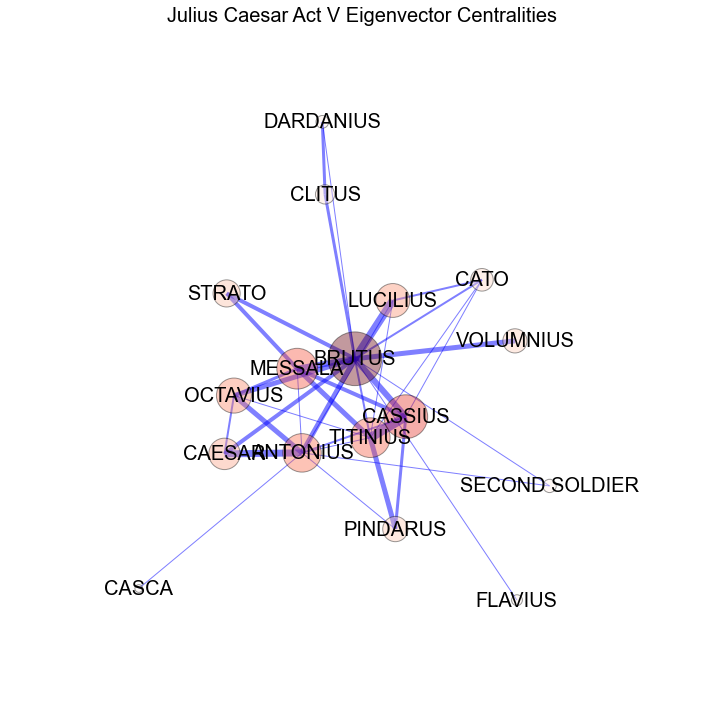

In [37]:
G = graph_dic[ract_dic[cnum[4]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
ec = nx.eigenvector_centrality(G)
ecs={}
for k,v in ec.items():
    ecs[v]=k
for k in sorted(ecs,reverse=True):
    print labels[ecs[k]], 'has eigenvector centrality', k
pos=pos_dict[4]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=ec.keys(),
                       node_size = [d*5000 for d in ec.values()],node_color=ec.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Julius Caesar Act V Eigenvector Centralities",fontsize=20)
kk=plt.axis('off')

BRUTUS has eigenvector centrality 0.56933558257
CAESAR has eigenvector centrality 0.50142697793
CASSIUS has eigenvector centrality 0.456244577027
ANTONIUS has eigenvector centrality 0.401104756143
CASCA has eigenvector centrality 0.107533935976
PORTIA has eigenvector centrality 0.0895843852913
OCTAVIUS has eigenvector centrality 0.0719553297477
MESSALA has eigenvector centrality 0.0678015660149
TITINIUS has eigenvector centrality 0.0605447822841
SECOND SERVANT has eigenvector centrality 0.0582989519214
LUCILIUS has eigenvector centrality 0.0568690695922
ARTEMIDORUS has eigenvector centrality 0.049707570744
DECIUS has eigenvector centrality 0.046761395152
CINNA has eigenvector centrality 0.0374566923209
CALPURNIA has eigenvector centrality 0.0373371141457
METELLUS has eigenvector centrality 0.0353428391374
PUBLIUS has eigenvector centrality 0.028372767546
THIRD CITIZEN has eigenvector centrality 0.0276832880722
CICERO has eigenvector centrality 0.0270620661214
SECOND CITIZEN has eigenve

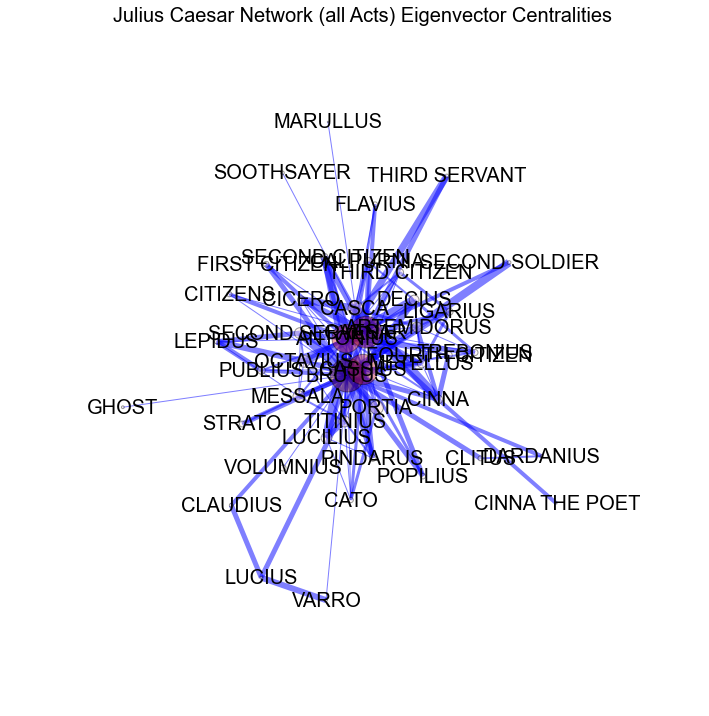

In [38]:
-

### PageRank

CASSIUS has PageRank 0.251231865711
CAESAR has PageRank 0.201888026262
BRUTUS has PageRank 0.139179374716
CASCA has PageRank 0.133933064201
ANTONIUS has PageRank 0.0544409898925
CINNA has PageRank 0.0429698677905
CICERO has PageRank 0.0367654428315
CALPURNIA has PageRank 0.0230787815929
FLAVIUS has PageRank 0.0198290694332
METELLUS has PageRank 0.0198105391736
SOOTHSAYER has PageRank 0.0128771392016
MARULLUS has PageRank 0.0128247910299
TITINIUS has PageRank 0.0127646363207


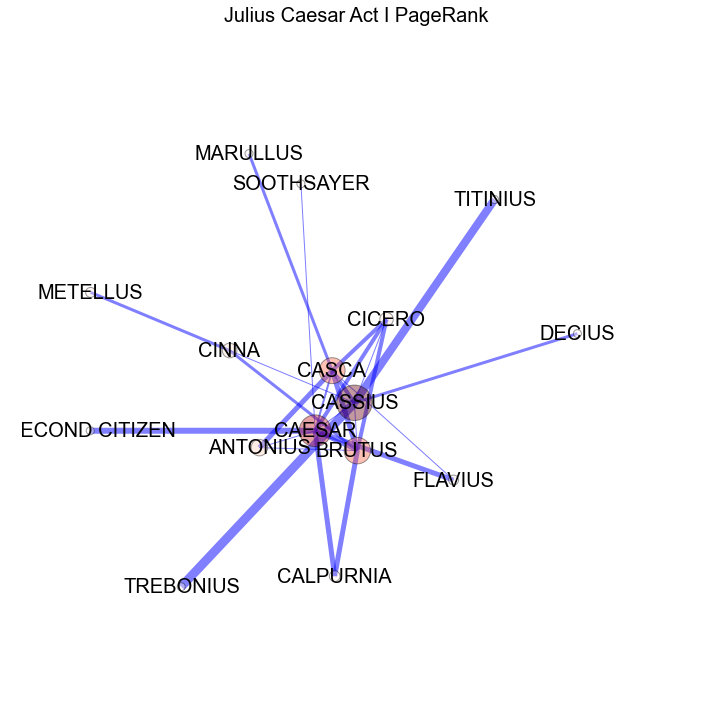

In [39]:
G = graph_dic[ract_dic[cnum[0]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
pr = nx.pagerank(G)
prs={}
for k,v in pr.items():
    prs[v]=k
for k in sorted(prs,reverse=True):
    print labels[prs[k]], 'has PageRank', k
pos=pos_dict[0]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=pr.keys(),
                       node_size = [d*5000 for d in pr.values()],node_color=pr.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Julius Caesar Act I PageRank",fontsize=20)
kk=plt.axis('off')

CAESAR has PageRank 0.266135300693
BRUTUS has PageRank 0.16908395312
CASSIUS has PageRank 0.0969300659347
PORTIA has PageRank 0.0869458756271
ARTEMIDORUS has PageRank 0.0747523212442
DECIUS has PageRank 0.0474026669001
CALPURNIA has PageRank 0.0366272581889
LIGARIUS has PageRank 0.0359561631116
ANTONIUS has PageRank 0.0344288641689
METELLUS has PageRank 0.0337588313688
TREBONIUS has PageRank 0.0235508730965
CASCA has PageRank 0.0202241818236
PUBLIUS has PageRank 0.0154769119576
LUCIUS has PageRank 0.0131598744942
CATO has PageRank 0.0121828019524


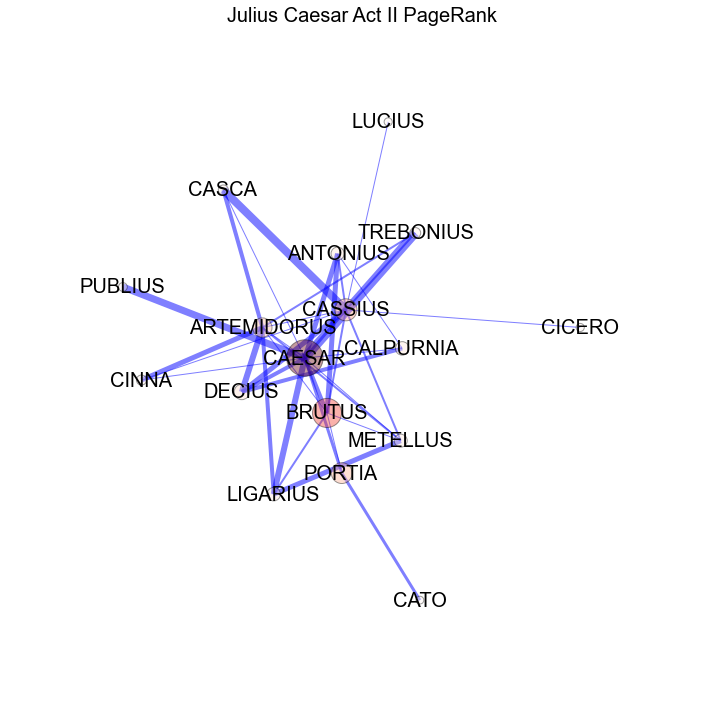

In [40]:
G = graph_dic[ract_dic[cnum[1]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
pr = nx.pagerank(G)
prs={}
for k,v in pr.items():
    prs[v]=k
for k in sorted(prs,reverse=True):
    print labels[prs[k]], 'has PageRank', k
pos=pos_dict[1]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=pr.keys(),
                       node_size = [d*5000 for d in pr.values()],node_color=pr.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Julius Caesar Act II PageRank",fontsize=20)
kk=plt.axis('off')

CAESAR has PageRank 0.204127625779
ANTONIUS has PageRank 0.195452001821
BRUTUS has PageRank 0.181336568592
CASSIUS has PageRank 0.0692437320962
SECOND SERVANT has PageRank 0.0455467310474
CINNA has PageRank 0.0315511933283
THIRD CITIZEN has PageRank 0.030296749039
FOURTH CITIZEN has PageRank 0.0212776813348
METELLUS has PageRank 0.0202450558372
DECIUS has PageRank 0.0193554712992
CASCA has PageRank 0.0187635960009
SECOND CITIZEN has PageRank 0.0185200212886
PUBLIUS has PageRank 0.0167037856471
FIRST CITIZEN has PageRank 0.0148335483617
OCTAVIUS has PageRank 0.0134257880733
ARTEMIDORUS has PageRank 0.0133319788264
POPILIUS has PageRank 0.0132473875301
CITIZENS has PageRank 0.0131208246375
TREBONIUS has PageRank 0.0125440354264
CINNA THE POET has PageRank 0.0122096703264
THIRD SERVANT has PageRank 0.00973321843087
LIGARIUS has PageRank 0.00882522366893
LEPIDUS has PageRank 0.00828761690047
SOOTHSAYER has PageRank 0.00802049470659


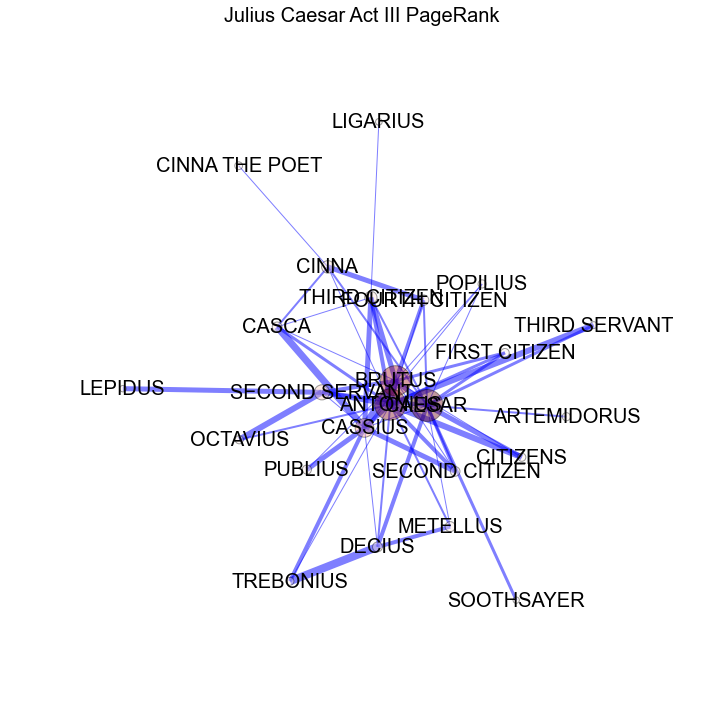

In [41]:
G = graph_dic[ract_dic[cnum[2]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
pr = nx.pagerank(G)
prs={}
for k,v in pr.items():
    prs[v]=k
for k in sorted(prs,reverse=True):
    print labels[prs[k]], 'has PageRank', k
pos=pos_dict[2]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=pr.keys(),
                       node_size = [d*5000 for d in pr.values()],node_color=pr.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Julius Caesar Act III PageRank",fontsize=20)
kk=plt.axis('off')

BRUTUS has PageRank 0.287548978717
CASSIUS has PageRank 0.203946376159
ANTONIUS has PageRank 0.0810698449234
MESSALA has PageRank 0.0575812260141
OCTAVIUS has PageRank 0.0528627481236
LEPIDUS has PageRank 0.0465866257882
LUCILIUS has PageRank 0.0410938393123
CLAUDIUS has PageRank 0.0293498786191
LUCIUS has PageRank 0.0277580788035
TITINIUS has PageRank 0.026281860454
PORTIA has PageRank 0.0258076672292
VARRO has PageRank 0.0249852958586
PINDARUS has PageRank 0.0223055644814
CICERO has PageRank 0.0222100025022
CAESAR has PageRank 0.022000599421
PUBLIUS has PageRank 0.0154233014212
GHOST has PageRank 0.0131881121723


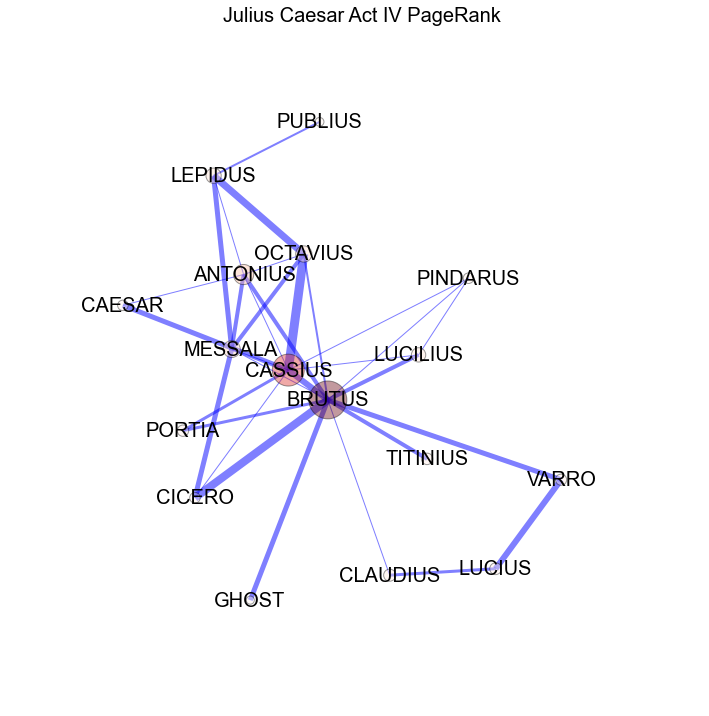

In [42]:
G = graph_dic[ract_dic[cnum[3]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
pr = nx.pagerank(G)
prs={}
for k,v in pr.items():
    prs[v]=k
for k in sorted(prs,reverse=True):
    print labels[prs[k]], 'has PageRank', k
pos=pos_dict[3]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=pr.keys(),
                       node_size = [d*5000 for d in pr.values()],node_color=pr.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Julius Caesar Act IV PageRank",fontsize=20)
kk=plt.axis('off')

BRUTUS has PageRank 0.222260007803
ANTONIUS has PageRank 0.102163478121
CASSIUS has PageRank 0.0952186560624
TITINIUS has PageRank 0.0888885220622
MESSALA has PageRank 0.0838178749591
OCTAVIUS has PageRank 0.06200711697
CAESAR has PageRank 0.0529843077817
LUCILIUS has PageRank 0.0529601884208
PINDARUS has PageRank 0.039782523849
CLITUS has PageRank 0.0363544590574
CATO has PageRank 0.0360606144199
STRATO has PageRank 0.0344716123117
DARDANIUS has PageRank 0.0275885787505
VOLUMNIUS has PageRank 0.0253955474777
SECOND SOLDIER has PageRank 0.0156114912708
CASCA has PageRank 0.0122970876576
FLAVIUS has PageRank 0.012137933025


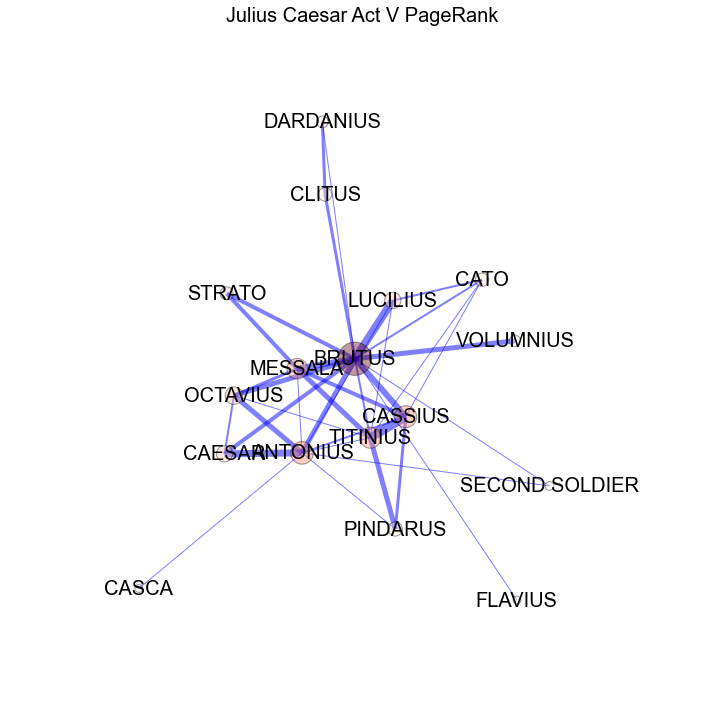

In [43]:
G = graph_dic[ract_dic[cnum[4]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
pr = nx.pagerank(G)
prs={}
for k,v in pr.items():
    prs[v]=k
for k in sorted(prs,reverse=True):
    print labels[prs[k]], 'has PageRank', k
pos=pos_dict[4]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=pr.keys(),
                       node_size = [d*5000 for d in pr.values()],node_color=pr.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Julius Caesar Act V PageRank",fontsize=20)
kk=plt.axis('off')

BRUTUS has PageRank 0.198600084948
CAESAR has PageRank 0.154065523858
CASSIUS has PageRank 0.11938556815
ANTONIUS has PageRank 0.102984502789
CASCA has PageRank 0.0328499128462
MESSALA has PageRank 0.0247702299332
TITINIUS has PageRank 0.0222825386736
OCTAVIUS has PageRank 0.0208529626483
PORTIA has PageRank 0.0190256589365
CINNA has PageRank 0.018569793699
ARTEMIDORUS has PageRank 0.016751978941
LUCILIUS has PageRank 0.0161730106181
SECOND SERVANT has PageRank 0.0148289998965
DECIUS has PageRank 0.0144039736409
METELLUS has PageRank 0.013811510498
PINDARUS has PageRank 0.0114505808971
CLITUS has PageRank 0.0107799075511
CICERO has PageRank 0.0107017030584
CALPURNIA has PageRank 0.0104221081558
CATO has PageRank 0.00967983590223
THIRD CITIZEN has PageRank 0.00959112842229
LIGARIUS has PageRank 0.00923354357073
PUBLIUS has PageRank 0.0090563231591
LUCIUS has PageRank 0.00888164959723
DARDANIUS has PageRank 0.00866007852049
STRATO has PageRank 0.00840143641177
FOURTH CITIZEN has PageRank

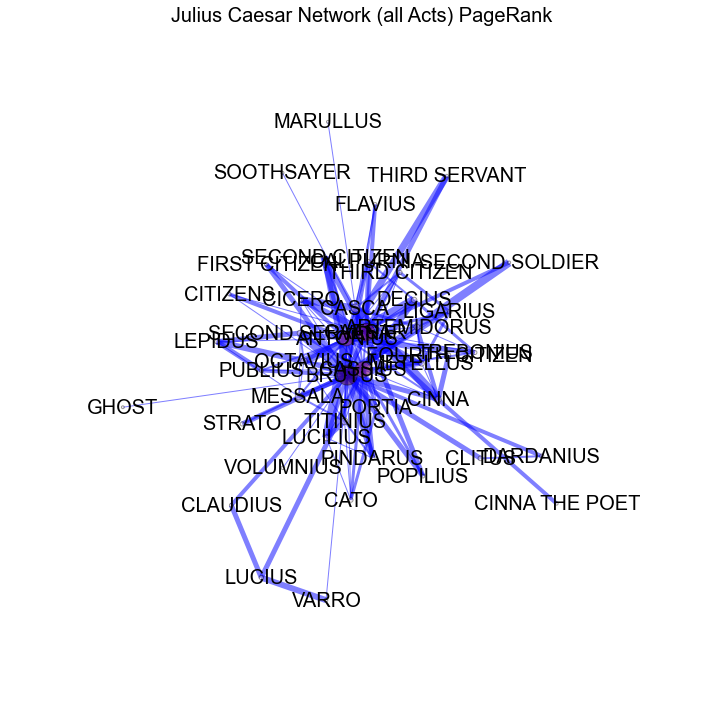

In [44]:
G=plot_total_graph_with_weights(graph_dic,nodper_dic)
weights={(nd[0],nd[1]):str(nd[2]['weight']) for nd in G.edges(data=True)}
# G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
pr = nx.pagerank(G)
prs={}
for k,v in pr.items():
    prs[v]=k
for k in sorted(prs,reverse=True):
    print labels[prs[k]], 'has PageRank', k
pos=pos_dict[5]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=pr.keys(),
                       node_size = [d*2000 for d in pr.values()],node_color=pr.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Julius Caesar Network (all Acts) PageRank",fontsize=20)
kk=plt.axis('off')

## Communities

Number of communities of Julius Caesar Act I network = 2
Community partition of Julius Caesar Act I network:
[['MARULLUS', 'CASCA', 'CICERO', 'CAESAR', 'CALPURNIA', 'FLAVIUS', 'SECOND CITIZEN', 'ANTONIUS', 'SOOTHSAYER'], ['DECIUS', 'BRUTUS', 'TITINIUS', 'CASSIUS', 'METELLUS', 'CINNA', 'TREBONIUS']]
Community modularity of Julius Caesar Act I network = 0.1581


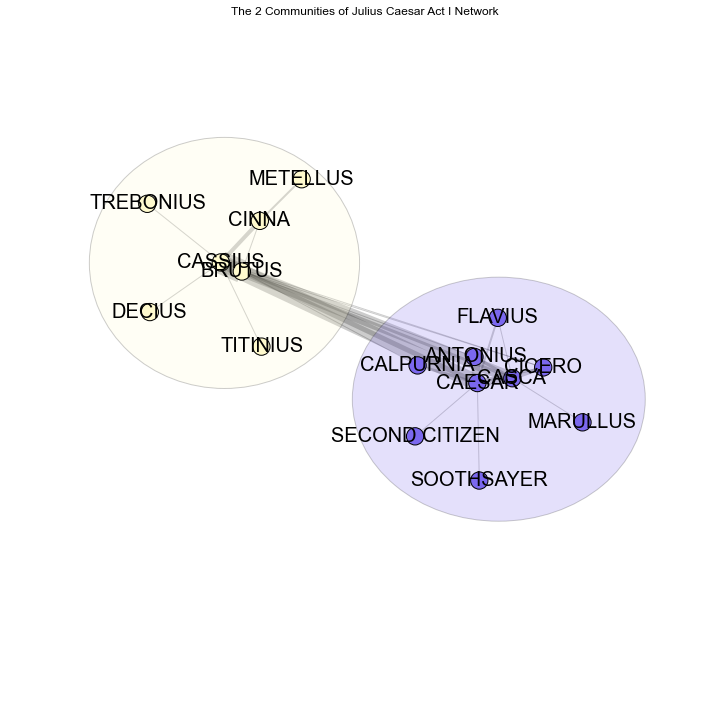

In [62]:
from chAs import draw_comms,modul_arity
import community as comm

G = graph_dic[ract_dic[cnum[0]]]
G.remove_nodes_from(nx.isolates(G))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}

part=comm.best_partition(G) 
print 'Number of communities of Julius Caesar Act I network =', max(part.values())+1
print 'Community partition of Julius Caesar Act I network:'
parLis=[]
partdi={}
for i,k in part.items():
    if k not in partdi:
        partdi[k]=[nodper_dic[i]]
    else:
        partdi[k].append(nodper_dic[i])
for i,k in partdi.items():
    parLis.append(k)
print parLis
print 'Community modularity of Julius Caesar Act I network =', "%.4f" % comm.modularity(part,G)

d=0.8 
dd=0.8
c=1.2
cc=1.4
alpha=0.2
ealpha=.2
vcc={}
sstt="The %s Communities of Julius Caesar Act I Network" %(max(part.values())+1)

draw_comms(G,G.nodes(),[],[],[] ,part,part,d,dd,c,cc,alpha,ealpha,nodper_dic,sstt)

Number of communities of Julius Caesar Act II network = 3
Community partition of Julius Caesar Act II network:
[['PORTIA', 'BRUTUS', 'LIGARIUS', 'METELLUS', 'CATO'], ['CASCA', 'CICERO', 'LUCIUS', 'CASSIUS', 'CINNA', 'ANTONIUS'], ['DECIUS', 'CAESAR', 'CALPURNIA', 'PUBLIUS', 'ARTEMIDORUS', 'TREBONIUS']]
Community modularity of Julius Caesar Act II network = 0.2184


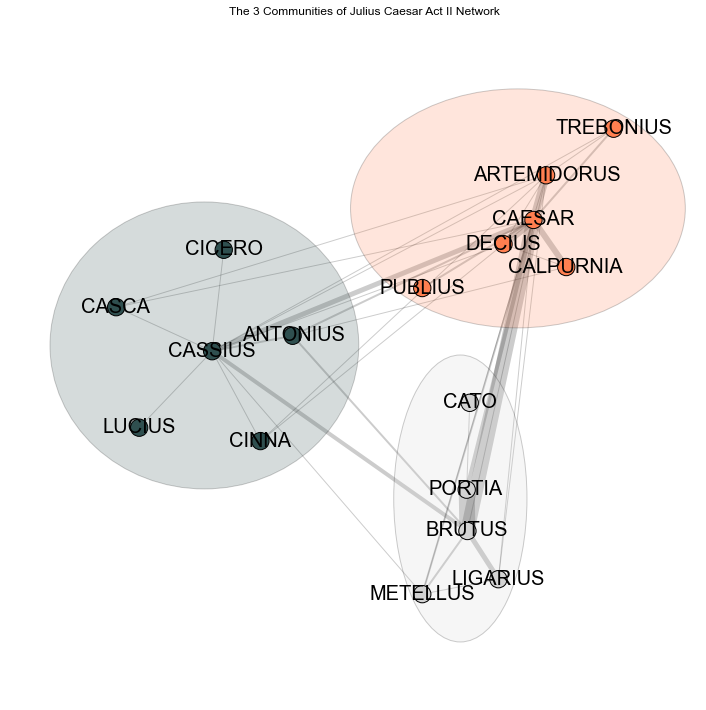

In [46]:
from chAs import draw_comms,modul_arity
import community as comm

G = graph_dic[ract_dic[cnum[1]]]
G.remove_nodes_from(nx.isolates(G))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}

part=comm.best_partition(G) 
print 'Number of communities of Julius Caesar Act II network =', max(part.values())+1
print 'Community partition of Julius Caesar Act II network:'
parLis=[]
partdi={}
for i,k in part.items():
    if k not in partdi:
        partdi[k]=[nodper_dic[i]]
    else:
        partdi[k].append(nodper_dic[i])
for i,k in partdi.items():
    parLis.append(k)
print parLis
print 'Community modularity of Julius Caesar Act II network =', "%.4f" % comm.modularity(part,G)

d=0.8 
dd=0.8
c=1.2
cc=1.4
alpha=0.2
ealpha=.2
vcc={}
sstt="The %s Communities of Julius Caesar Act II Network" %(max(part.values())+1)

draw_comms(G,G.nodes(),[],[],[] ,part,part,d,dd,c,cc,alpha,ealpha,nodper_dic,sstt)

Number of communities of Julius Caesar Act III network = 3
Community partition of Julius Caesar Act III network:
[['FIRST CITIZEN', 'SECOND SERVANT', 'FOURTH CITIZEN', 'BRUTUS', 'CAESAR', 'THIRD SERVANT', 'LEPIDUS', 'OCTAVIUS', 'SECOND CITIZEN', 'ANTONIUS', 'ARTEMIDORUS', 'CITIZENS', 'SOOTHSAYER'], ['CINNA THE POET', 'CASCA', 'LIGARIUS', 'THIRD CITIZEN', 'CINNA'], ['DECIUS', 'CASSIUS', 'PUBLIUS', 'METELLUS', 'TREBONIUS', 'POPILIUS']]
Community modularity of Julius Caesar Act III network = 0.0891


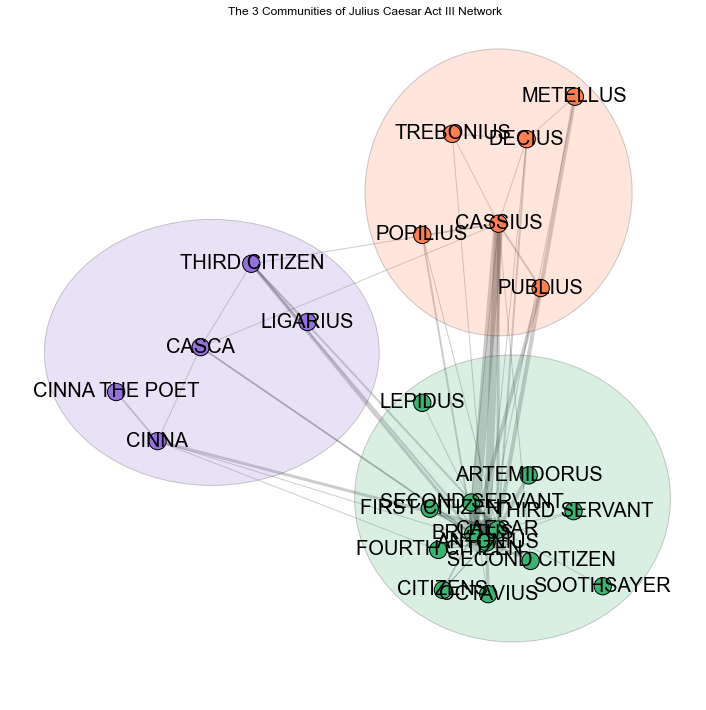

In [80]:
from chAs import draw_comms,modul_arity
import community as comm

G = graph_dic[ract_dic[cnum[2]]]
G.remove_nodes_from(nx.isolates(G))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}

part=comm.best_partition(G) 
print 'Number of communities of Julius Caesar Act III network =', max(part.values())+1
print 'Community partition of Julius Caesar Act III network:'
parLis=[]
partdi={}
for i,k in part.items():
    if k not in partdi:
        partdi[k]=[nodper_dic[i]]
    else:
        partdi[k].append(nodper_dic[i])
for i,k in partdi.items():
    parLis.append(k)
print parLis
print 'Community modularity of Julius Caesar Act III network =', "%.4f" % comm.modularity(part,G)

d=0.8 
dd=0.8
c=1.2
cc=1.4
alpha=0.2
ealpha=.2
vcc={}
sstt="The %s Communities of Julius Caesar Act III Network" %(max(part.values())+1)

draw_comms(G,G.nodes(),[],[],[] ,part,part,d,dd,c,cc,alpha,ealpha,nodper_dic,sstt)

Number of communities of Julius Caesar Act IV network = 3
Community partition of Julius Caesar Act IV network:
[['PORTIA', 'BRUTUS', 'TITINIUS', 'PINDARUS', 'LUCILIUS', 'GHOST', 'CASSIUS'], ['CLAUDIUS', 'VARRO', 'LUCIUS'], ['MESSALA', 'CICERO', 'CAESAR', 'LEPIDUS', 'PUBLIUS', 'OCTAVIUS', 'ANTONIUS']]
Community modularity of Julius Caesar Act IV network = 0.2031


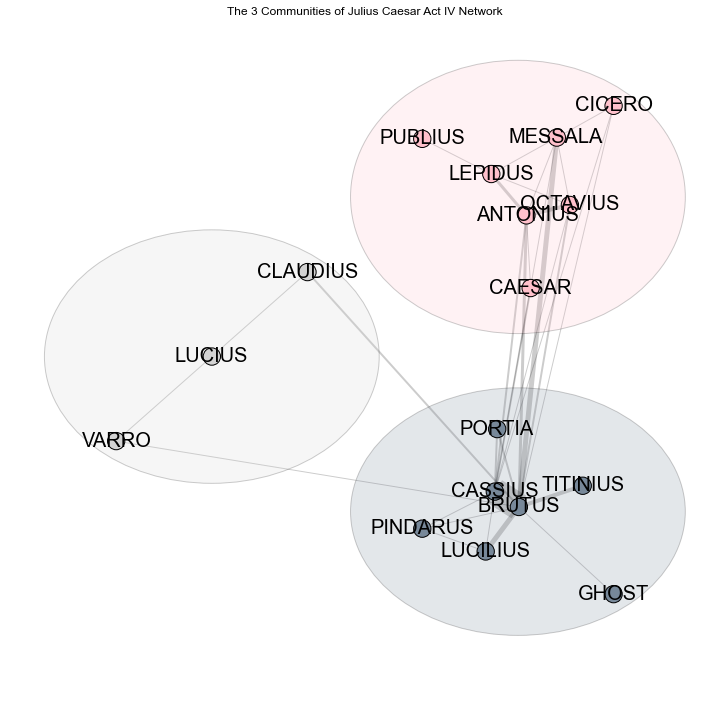

In [83]:
from chAs import draw_comms,modul_arity
import community as comm

G = graph_dic[ract_dic[cnum[3]]]
G.remove_nodes_from(nx.isolates(G))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}

part=comm.best_partition(G) 
print 'Number of communities of Julius Caesar Act IV network =', max(part.values())+1
print 'Community partition of Julius Caesar Act IV network:'
parLis=[]
partdi={}
for i,k in part.items():
    if k not in partdi:
        partdi[k]=[nodper_dic[i]]
    else:
        partdi[k].append(nodper_dic[i])
for i,k in partdi.items():
    parLis.append(k)
print parLis
print 'Community modularity of Julius Caesar Act IV network =', "%.4f" % comm.modularity(part,G)

d=0.8 
dd=0.8
c=1.2
cc=1.4
alpha=0.2
ealpha=.2
vcc={}
sstt="The %s Communities of Julius Caesar Act IV Network" %(max(part.values())+1)

draw_comms(G,G.nodes(),[],[],[] ,part,part,d,dd,c,cc,alpha,ealpha,nodper_dic,sstt)

Number of communities of Julius Caesar Act V network = 3
Community partition of Julius Caesar Act V network:
[['CLITUS', 'BRUTUS', 'LUCILIUS', 'DARDANIUS', 'VOLUMNIUS', 'FLAVIUS', 'CATO'], ['CASCA', 'CAESAR', 'OCTAVIUS', 'SECOND SOLDIER', 'ANTONIUS'], ['MESSALA', 'TITINIUS', 'PINDARUS', 'STRATO', 'CASSIUS']]
Community modularity of Julius Caesar Act V network = 0.2865


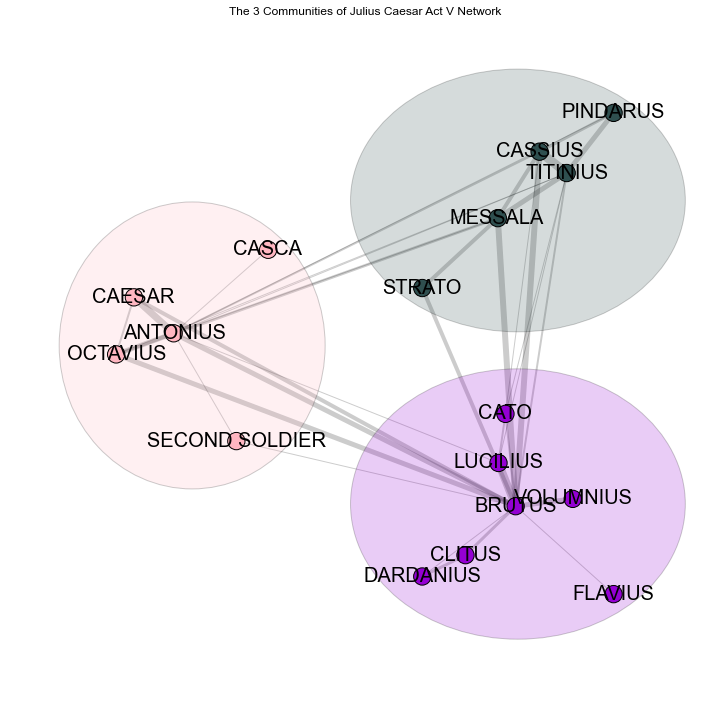

In [85]:
from chAs import draw_comms,modul_arity
import community as comm

G = graph_dic[ract_dic[cnum[4]]]
G.remove_nodes_from(nx.isolates(G))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}

part=comm.best_partition(G) 
print 'Number of communities of Julius Caesar Act V network =', max(part.values())+1
print 'Community partition of Julius Caesar Act V network:'
parLis=[]
partdi={}
for i,k in part.items():
    if k not in partdi:
        partdi[k]=[nodper_dic[i]]
    else:
        partdi[k].append(nodper_dic[i])
for i,k in partdi.items():
    parLis.append(k)
print parLis
print 'Community modularity of Julius Caesar Act V network =', "%.4f" % comm.modularity(part,G)

d=0.8 
dd=0.8
c=1.2
cc=1.4
alpha=0.2
ealpha=.2
vcc={}
sstt="The %s Communities of Julius Caesar Act V Network" %(max(part.values())+1)

draw_comms(G,G.nodes(),[],[],[] ,part,part,d,dd,c,cc,alpha,ealpha,nodper_dic,sstt)

Number of communities of Julius Caesar network (all Acts) = 5
Community partition of Julius Caesar network (all Acts):
[['PORTIA', 'CLAUDIUS', 'VARRO', 'MESSALA', 'BRUTUS', 'TITINIUS', 'LIGARIUS', 'LUCIUS', 'PINDARUS', 'LUCILIUS', 'GHOST', 'STRATO', 'VOLUMNIUS', 'CASSIUS', 'PUBLIUS', 'CATO', 'POPILIUS'], ['FIRST CITIZEN', 'SECOND SERVANT', 'DECIUS', 'CAESAR', 'THIRD SERVANT', 'CALPURNIA', 'LEPIDUS', 'OCTAVIUS', 'SECOND SOLDIER', 'METELLUS', 'SECOND CITIZEN', 'ANTONIUS', 'ARTEMIDORUS', 'CITIZENS', 'TREBONIUS', 'SOOTHSAYER'], ['MARULLUS', 'CASCA', 'CICERO', 'FLAVIUS', 'THIRD CITIZEN'], ['CLITUS', 'DARDANIUS'], ['CINNA THE POET', 'FOURTH CITIZEN', 'CINNA']]
Community modularity of Julius Caesar network (all Acts) = 0.1801


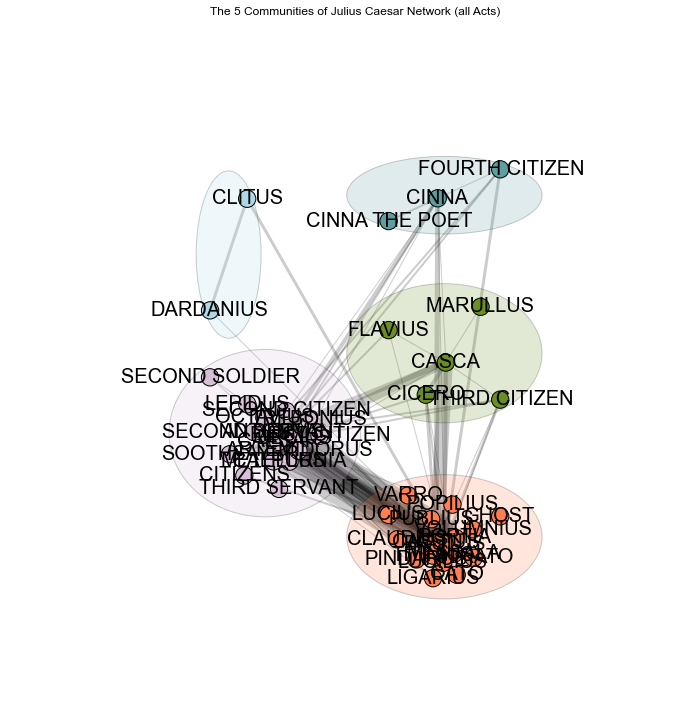

In [88]:
from chAs import draw_comms,modul_arity
import community as comm

G=plot_total_graph_with_weights(graph_dic,nodper_dic)
weights={(nd[0],nd[1]):str(nd[2]['weight']) for nd in G.edges(data=True)}
# G.remove_nodes_from(nx.isolates(G))
# G = graph_dic[ract_dic[cnum[0]]]
# G.remove_nodes_from(nx.isolates(G))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}

part=comm.best_partition(G) 
print 'Number of communities of Julius Caesar network (all Acts) =', max(part.values())+1
print 'Community partition of Julius Caesar network (all Acts):'
parLis=[]
partdi={}
for i,k in part.items():
    if k not in partdi:
        partdi[k]=[nodper_dic[i]]
    else:
        partdi[k].append(nodper_dic[i])
for i,k in partdi.items():
    parLis.append(k)
print parLis
print 'Community modularity of Julius Caesar network (all Acts) =', "%.4f" % comm.modularity(part,G)

d=0.8 
dd=0.8
c=1.2
cc=1.4
alpha=0.2
ealpha=.2
vcc={}
sstt="The %s Communities of Julius Caesar Network (all Acts)" %(max(part.values())+1)

draw_comms(G,G.nodes(),[],[],[] ,part,part,d,dd,c,cc,alpha,ealpha,nodper_dic,sstt)